In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [2]:
WD = pd.read_excel("E:\DS PROJECT\World_development_mesurement (1).xlsx")
WD

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [3]:
WD.rename(columns={'GDP#':'GDP', 'Country?':'Country'}, inplace=True)
WD.set_index('GDP',inplace=True)
WD

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
GDP,,,,,,,,,,,,,,,,,,,,,
"$54,790,058,957",0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,0.035,$60,NaN,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
"$9,129,594,819",0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,0.034,$22,NaN,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
"$2,359,122,303",0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,0.043,$15,NaN,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
"$5,788,311,645",0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,0.047,$152,NaN,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
"$2,610,959,139",0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,0.051,$12,NaN,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
"$16,244,600,000,000",0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,0.179,"$8,895",175.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
"$50,004,354,667",0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,0.089,"$1,308",310.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"


In [4]:
WD.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [5]:
WD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, $54,790,058,957 to nan
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   object 
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non

In [16]:
WD.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

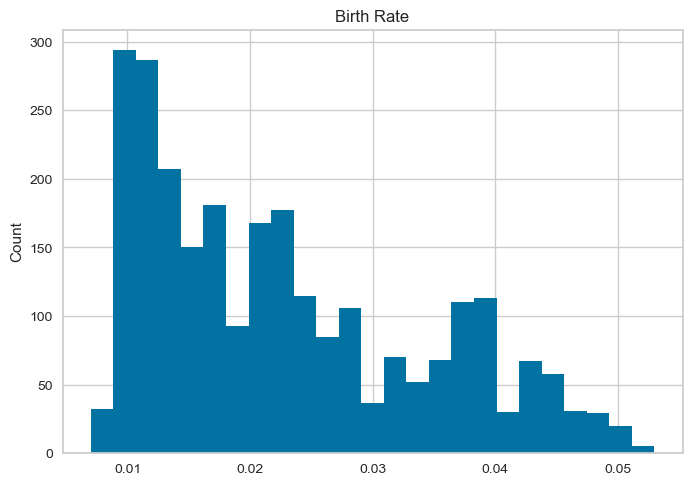

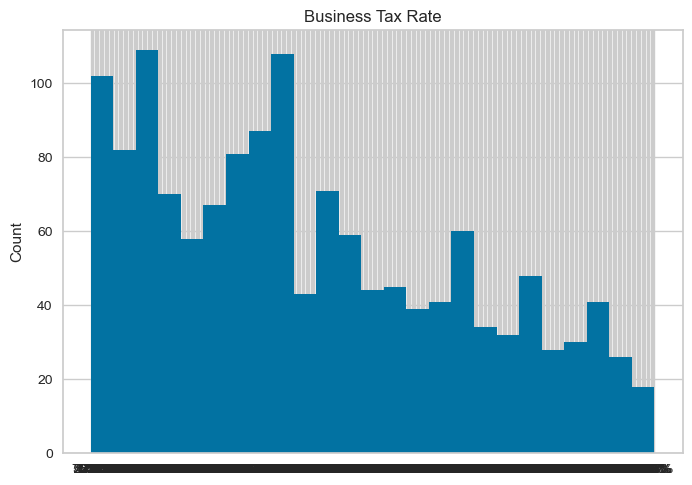

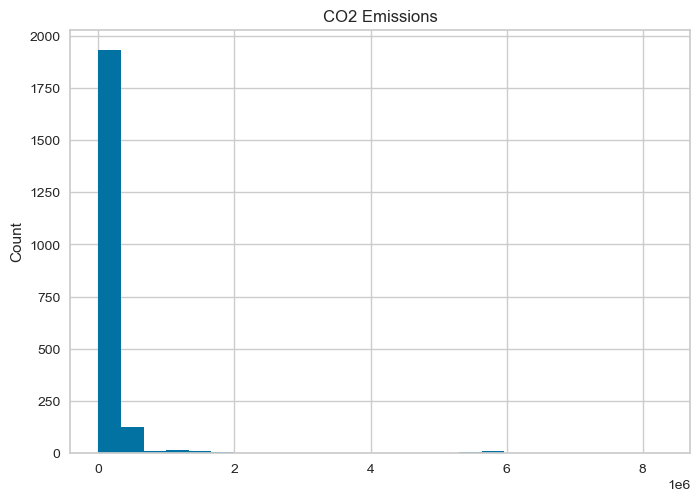

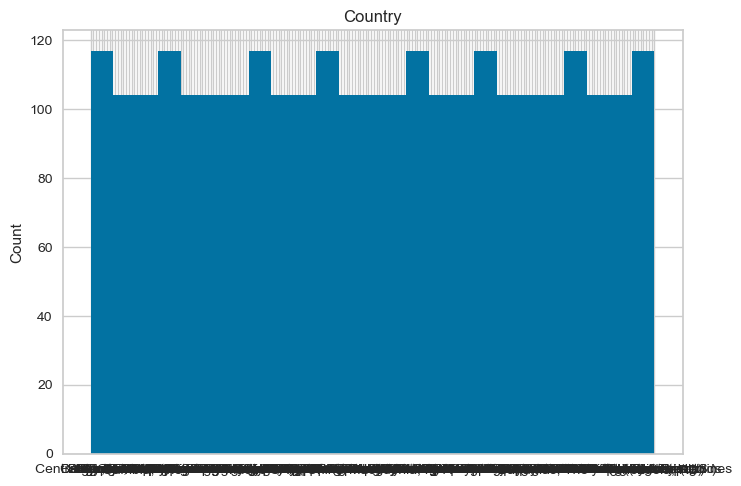

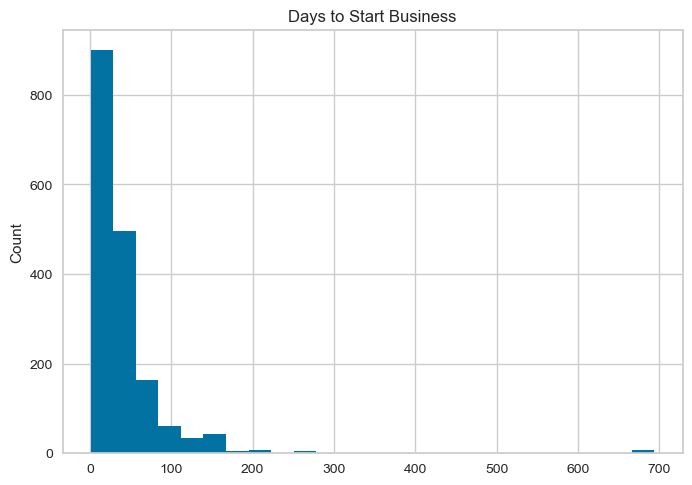

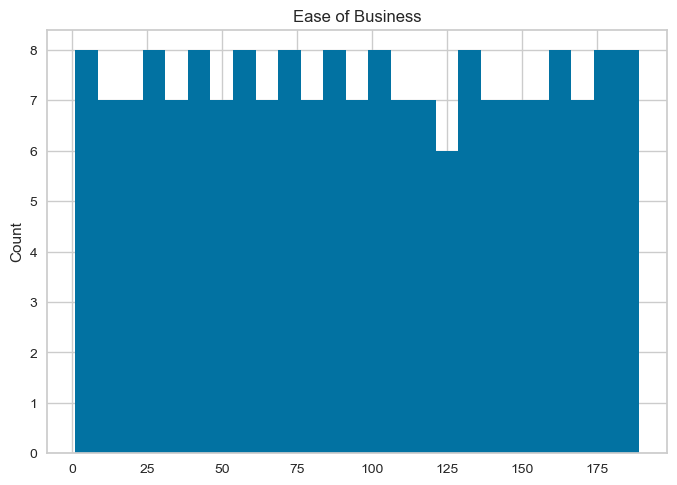

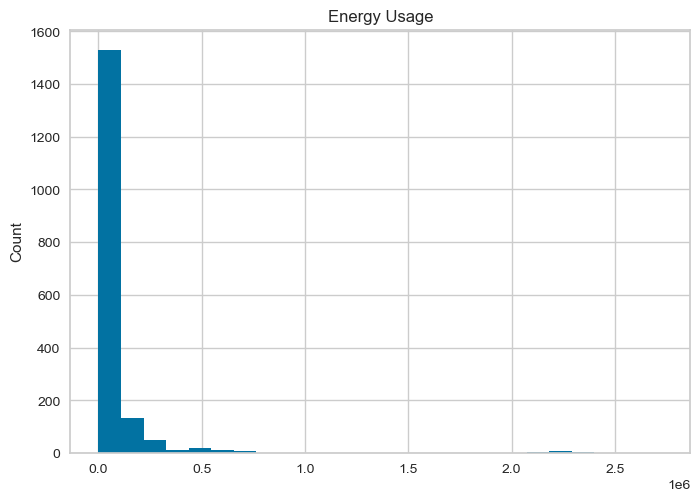

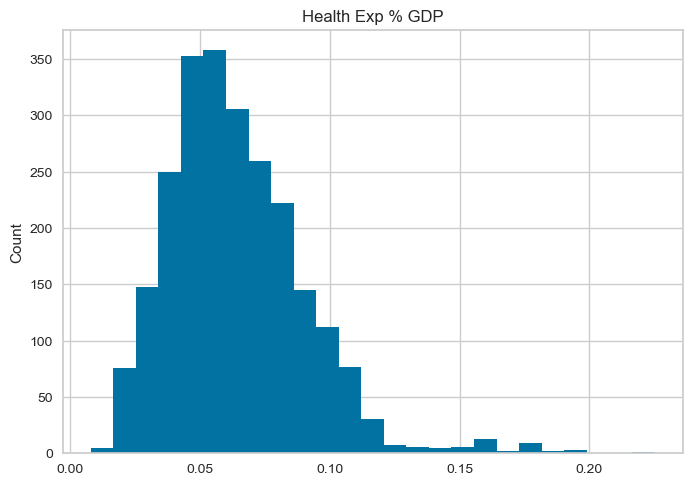

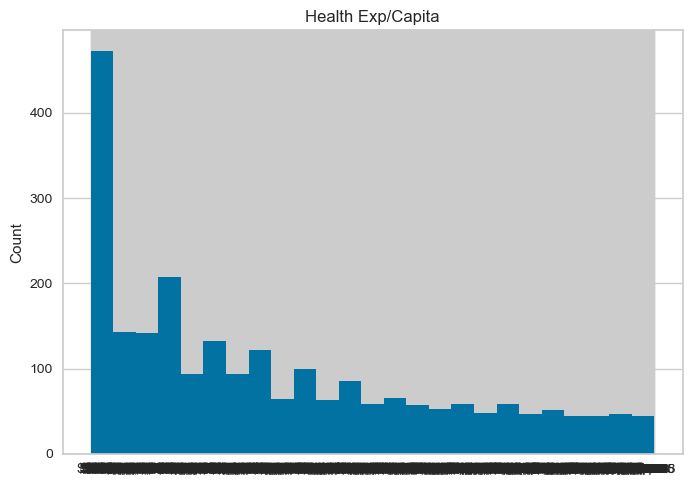

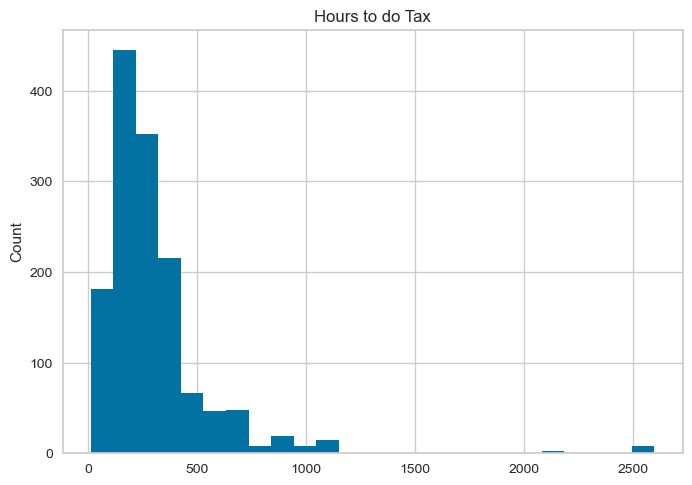

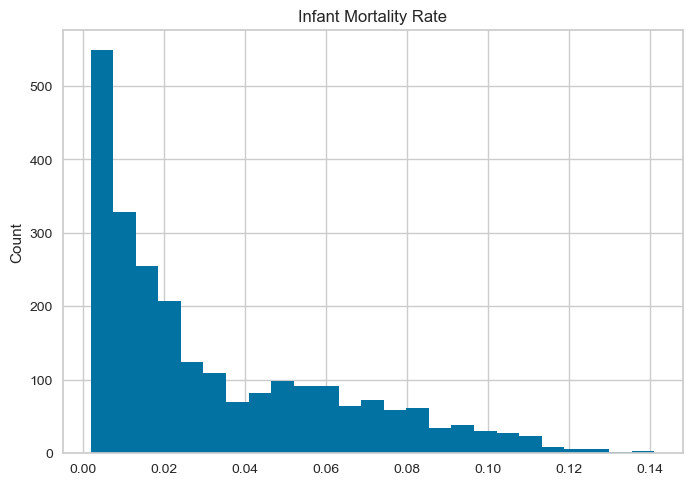

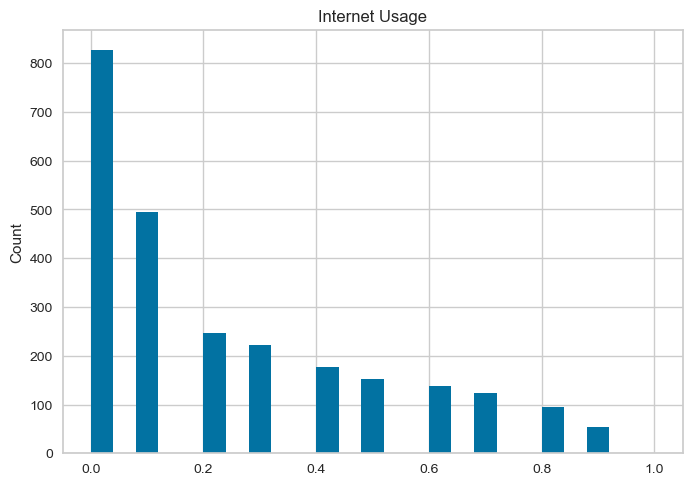

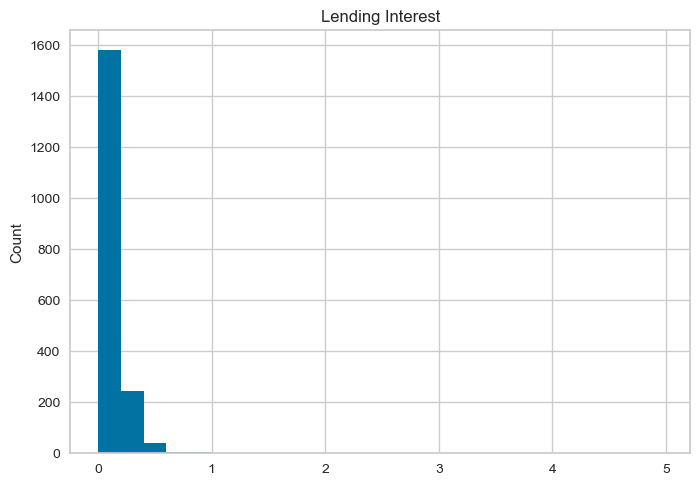

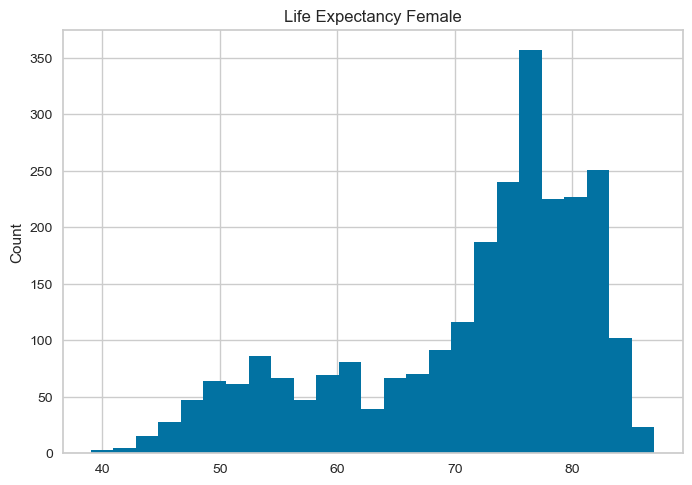

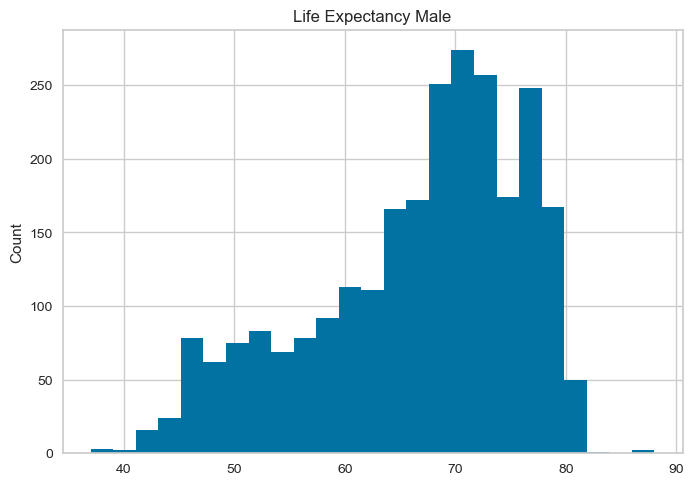

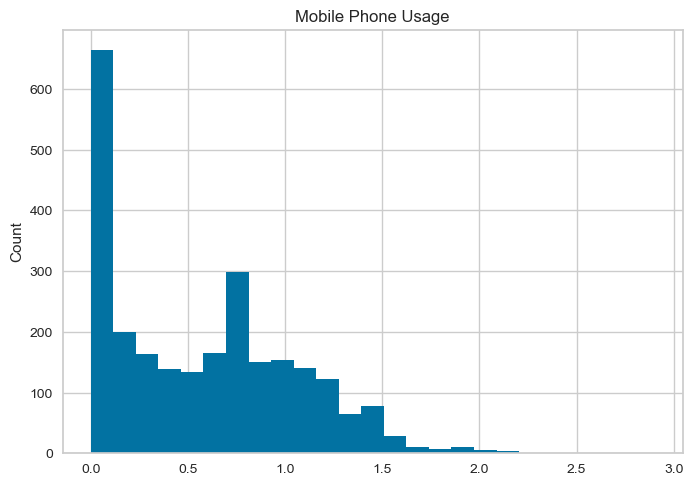

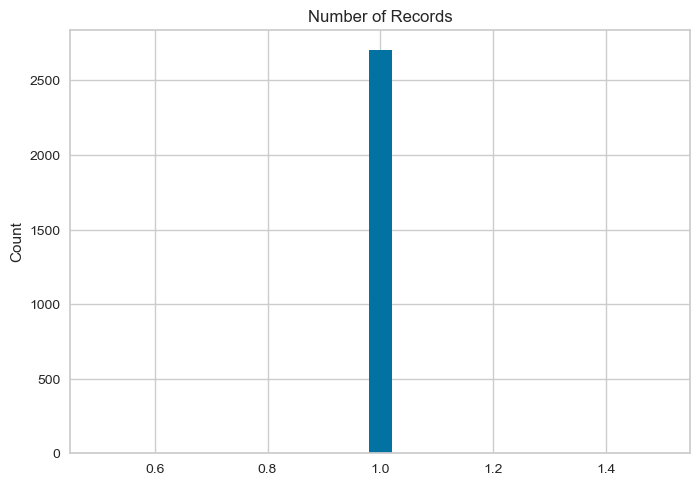

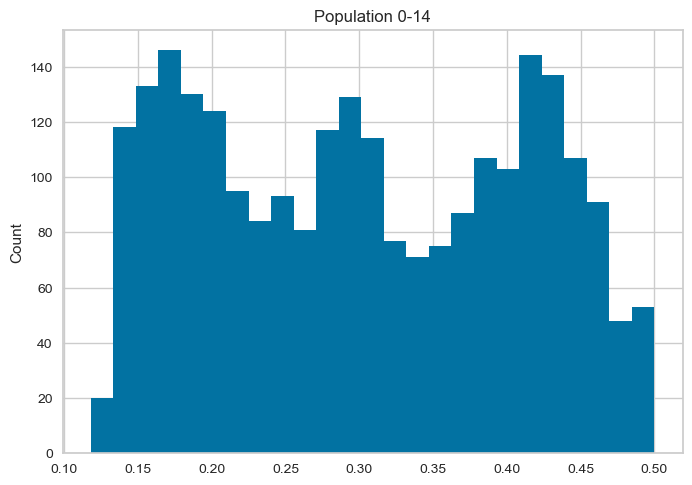

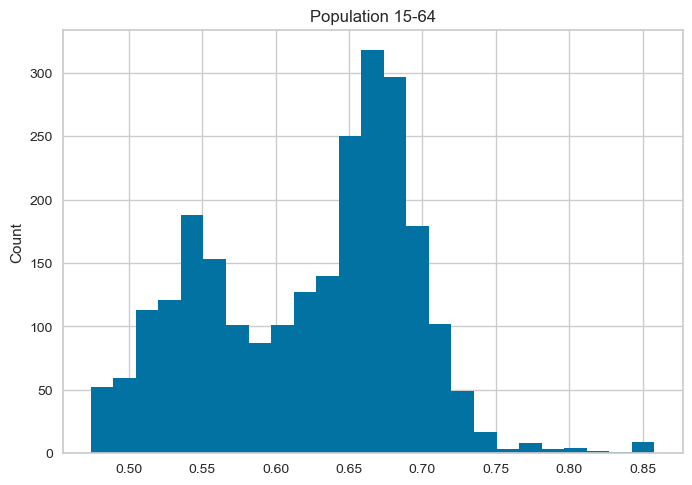

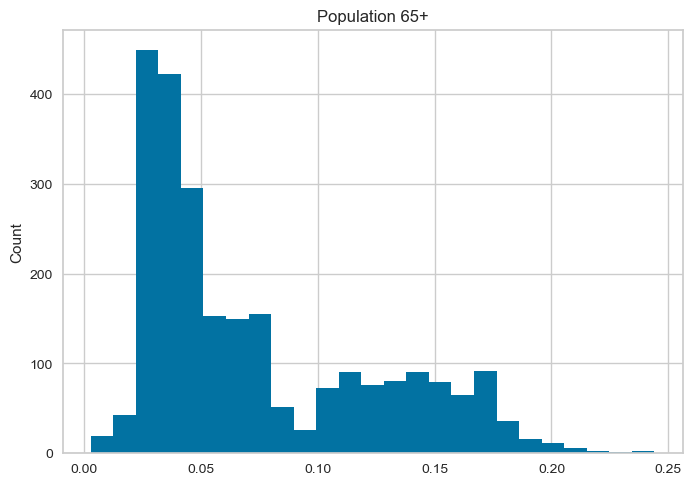

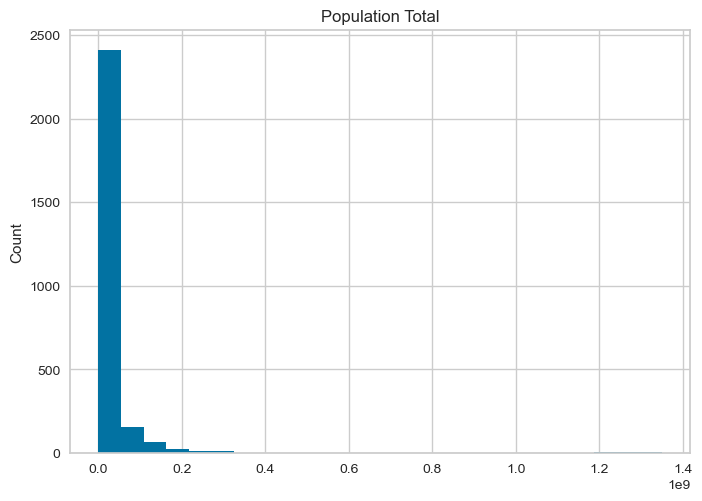

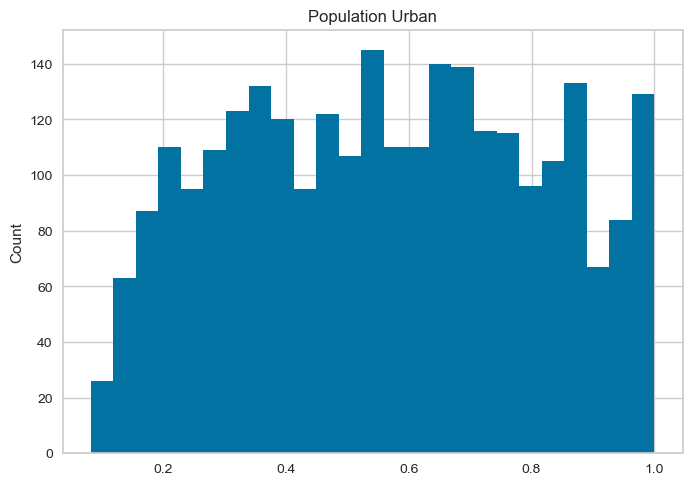

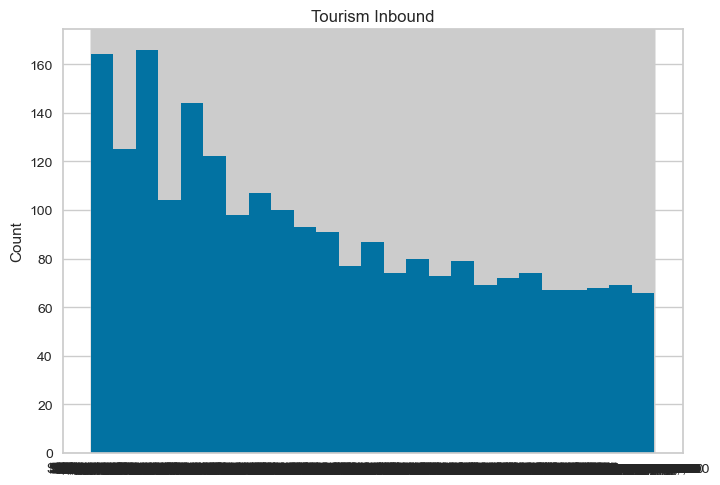

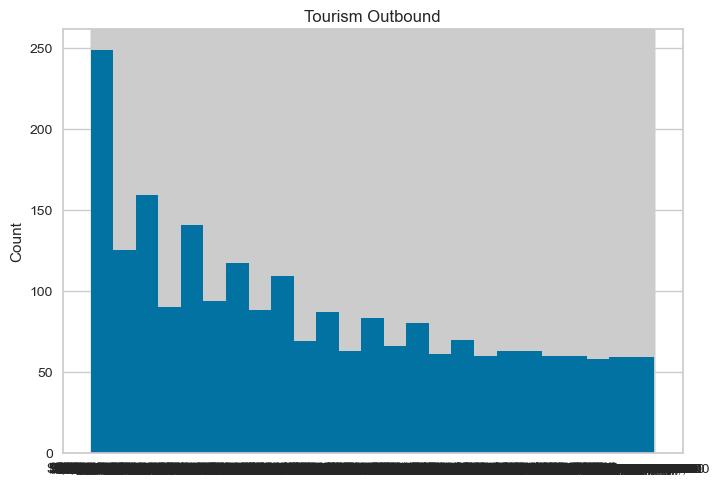

In [18]:
for feature in WD.columns:
    airline_data1 = WD.copy()
    airline_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [19]:
WD.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

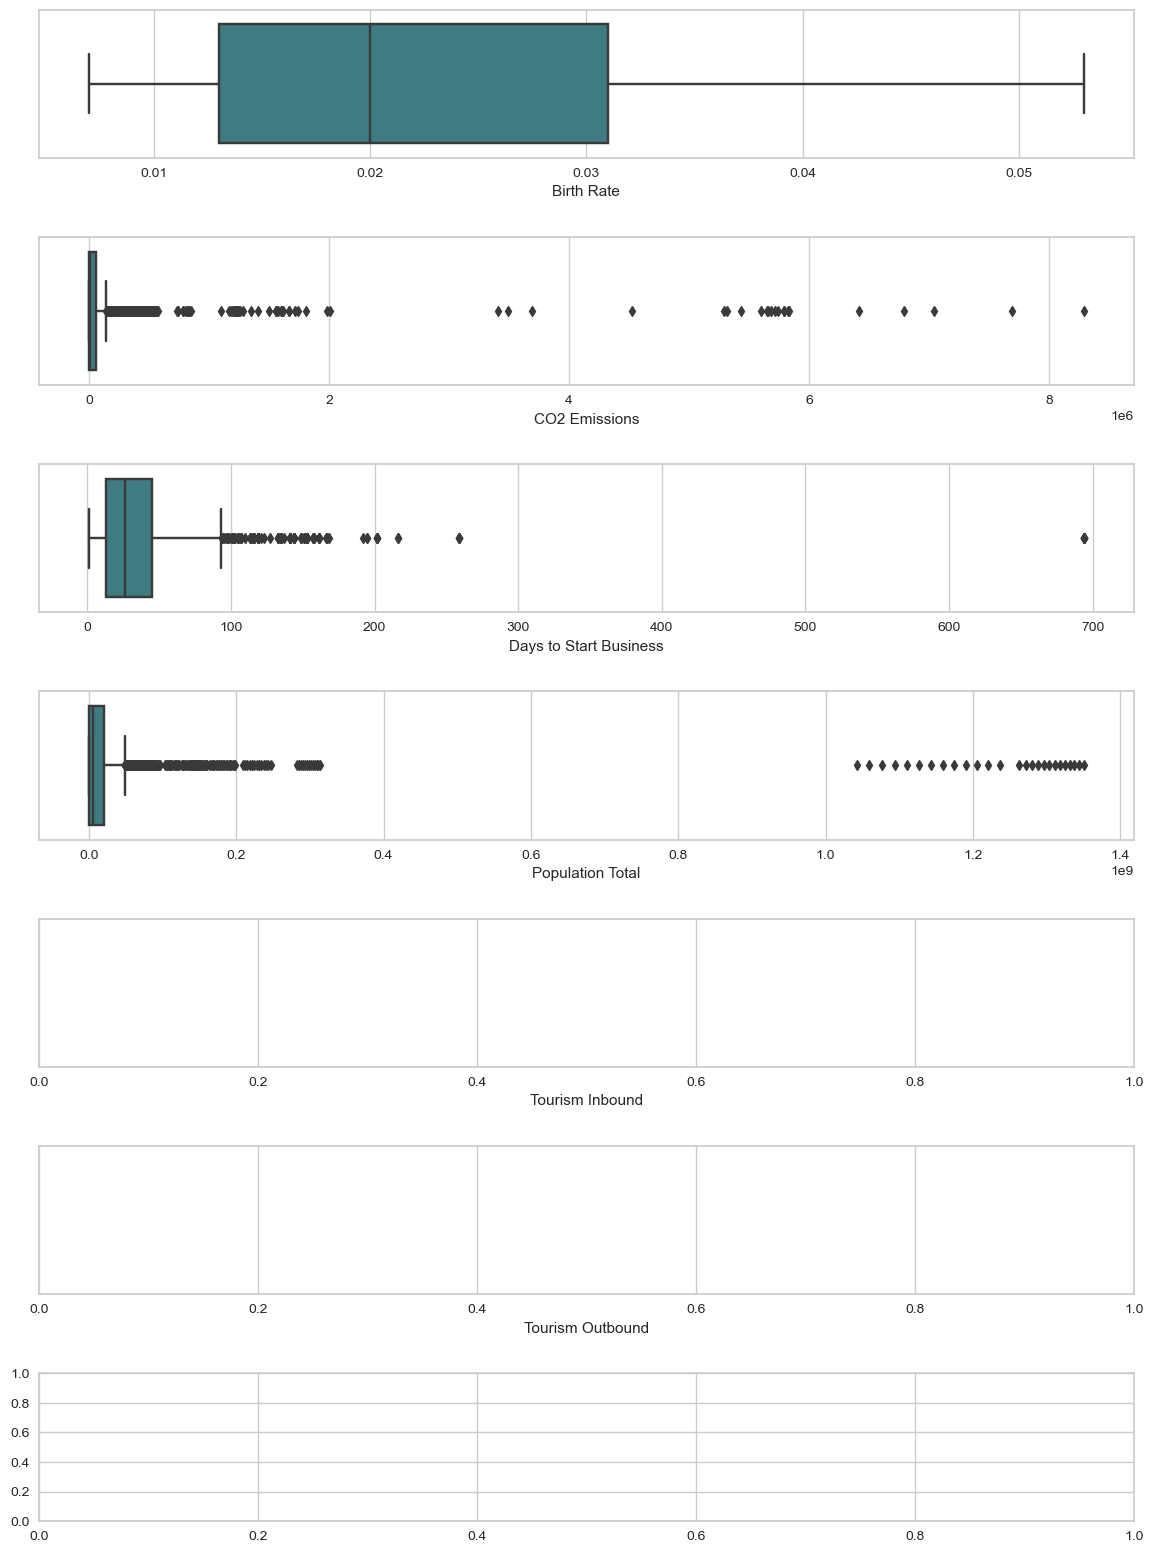

In [27]:
outlier = WD.copy()

# Check for numeric data
numeric_columns = [
    'Birth Rate', 'CO2 Emissions', 'Days to Start Business',
    'Population Total', 'Tourism Inbound', 'Tourism Outbound'
]

# Check if columns exist and are numeric
for col in numeric_columns:
    if col not in outlier.columns or not pd.api.types.is_numeric_dtype(outlier[col]):
        print(f"Warning: Column '{col}' is either missing or not numeric.")
        outlier[col] = pd.to_numeric(outlier[col], errors='coerce')  # Convert to numeric if possible

fig, axes = plt.subplots(7, 1, figsize=(12, 16), sharex=False, sharey=False)

# Numeric variables (horizontal orientation)
sns.boxplot(x='Birth Rate', data=outlier, palette='crest', ax=axes[0])
sns.boxplot(x='CO2 Emissions', data=outlier, palette='crest', ax=axes[1])
sns.boxplot(x='Days to Start Business', data=outlier, palette='crest', ax=axes[2])
sns.boxplot(x='Population Total', data=outlier, palette='crest', ax=axes[3])
sns.boxplot(x='Tourism Inbound', data=outlier, palette='crest', ax=axes[4])
sns.boxplot(x='Tourism Outbound', data=outlier, palette='crest', ax=axes[5])
plt.tight_layout(pad=2.0)
plt.show()


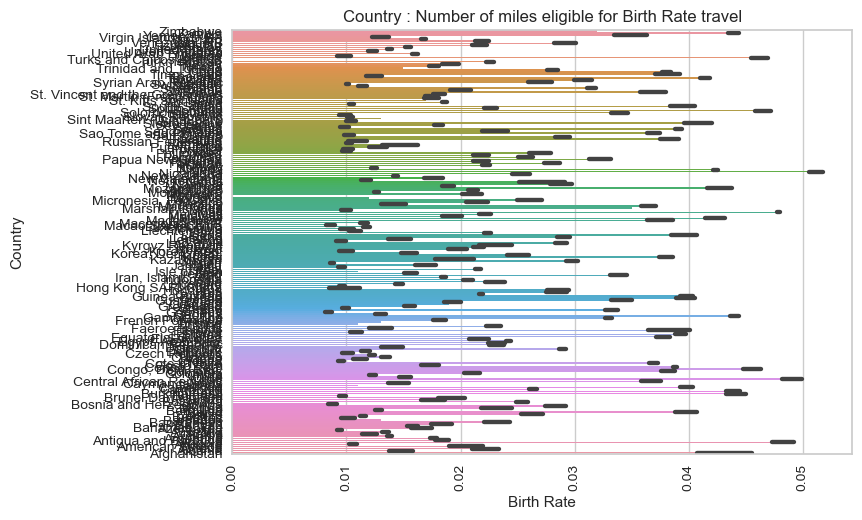

In [34]:
Balance = WD[['Birth Rate','Country']].sort_values('Country', ascending = False)
ax = sns.barplot(x='Birth Rate', y='Country', data= Balance)
ax.set(xlabel = 'Birth Rate', ylabel= 'Country')
plt.title('Country : Number of miles eligible for Birth Rate travel')
plt.xticks(rotation=90)
plt.show()

In [36]:
corr_matrix = WD.corr()
corr_matrix["Birth Rate"].sort_values(ascending=False)

Birth Rate                1.000000
Population 0-14           0.955966
Infant Mortality Rate     0.872535
Ease of Business          0.727492
Lending Interest          0.281503
Days to Start Business    0.169013
Hours to do Tax           0.069324
Population Total         -0.057851
Energy Usage             -0.169664
CO2 Emissions            -0.175750
Health Exp % GDP         -0.227653
Mobile Phone Usage       -0.558411
Population Urban         -0.606933
Internet Usage           -0.656132
Population 65+           -0.773014
Life Expectancy Male     -0.825745
Life Expectancy Female   -0.868174
Population 15-64         -0.912837
Number of Records              NaN
Name: Birth Rate, dtype: float64

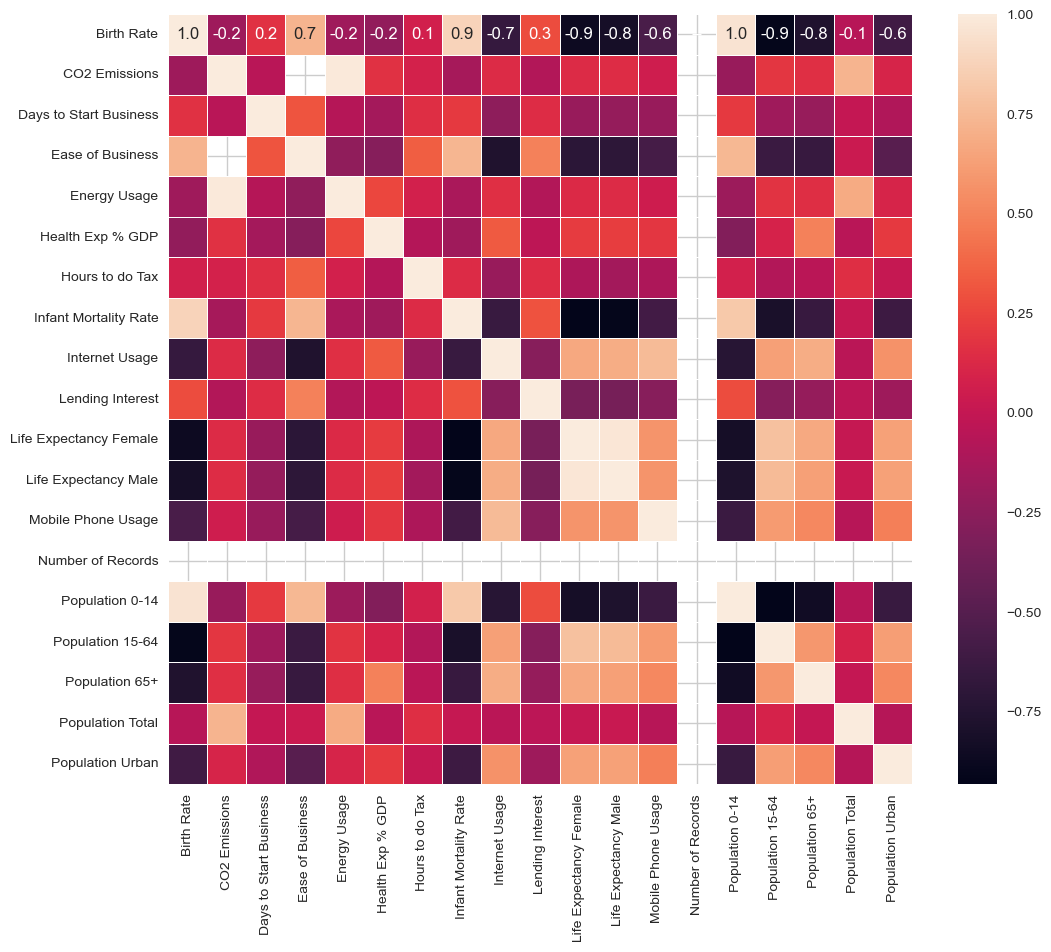

In [37]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(WD.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Copy the DataFrame
outlier = WD.copy()

# Convert percentage strings to numeric values
for col in outlier.columns:
    if outlier[col].dtype == 'object':
        # Check for percentage strings
        if outlier[col].str.contains('%', na=False).any():
            outlier[col] = outlier[col].str.replace('%', '').astype(float) / 100
        else:
            # Handle non-numeric columns (e.g., drop them or encode them)
            outlier[col] = pd.to_numeric(outlier[col], errors='coerce')

# Fill missing values with column mean (or other suitable method)
outlier.fillna(outlier.mean(), inplace=True)

# Apply StandardScaler
standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(outlier)

# Check the shape of the scaled data
print("Shape of scaled data:", std_airline.shape)


Shape of scaled data: (2704, 24)


In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Copy the DataFrame
outlier = WD.copy()

# Convert percentage strings to numeric values
for col in outlier.columns:
    if outlier[col].dtype == 'object':
        # Check for percentage strings
        if outlier[col].str.contains('%', na=False).any():
            outlier[col] = outlier[col].str.replace('%', '').astype(float) / 100
        else:
            # Handle non-numeric columns (drop or encode as needed)
            outlier[col] = pd.to_numeric(outlier[col], errors='coerce')

# Fill missing values with the column mean
outlier.fillna(outlier.mean(), inplace=True)

# Apply MinMaxScaler
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(outlier)

# Check the shape of the normalized data
print("Shape of normalized data:", norm_airline.shape)


Shape of normalized data: (2704, 24)


In [55]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import numpy as np

# Assuming std_airline is a NumPy array
# Create an imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
std_airline_imputed = imputer.fit_transform(std_airline)

# Apply KMeans clustering on the imputed data
cluster_range = range(1, 15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, n_init=10)
    clusters.fit(std_airline_imputed)  # Use imputed data
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

# Create a DataFrame to store the errors
clusters_df = pd.DataFrame({"Num_Clusters": cluster_range, "Cluster_Errors": cluster_errors})
print(clusters_df)


    Num_Clusters  Cluster_Errors
0              1    51376.000000
1              2    36535.825900
2              3    31185.934605
3              4    27141.791975
4              5    25142.876753
5              6    23759.171928
6              7    22173.171513
7              8    20850.553757
8              9    19353.463442
9             10    18318.643736
10            11    17053.172553
11            12    16081.448495
12            13    15319.254751
13            14    14338.071404


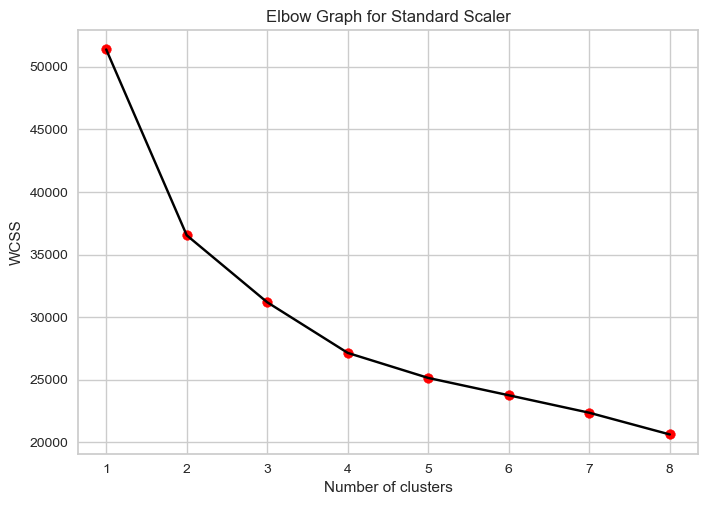

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
std_airline_imputed = imputer.fit_transform(std_airline)

# Apply KMeans and plot the elbow graph
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(std_airline_imputed)  # Use the imputed data
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(range(1, 9), wcss, color='black')
plt.scatter(range(1, 9), wcss, color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


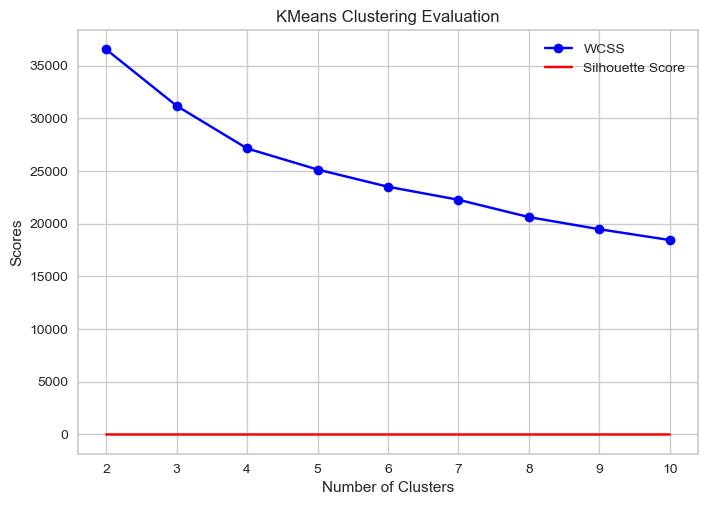

In [61]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
std_airline_imputed = imputer.fit_transform(std_airline)

# Now perform KMeans and calculate silhouette score
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airline_imputed)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(std_airline_imputed, KM_est.labels_)
    s_scores.append(silhouette_avg)

# Plot the results
plt.plot(n_clusters, clusters_inertia, color='blue', marker='o', label='WCSS')
plt.plot(n_clusters, s_scores, color='red', marker='x', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.title('KMeans Clustering Evaluation')
plt.legend()
plt.show()


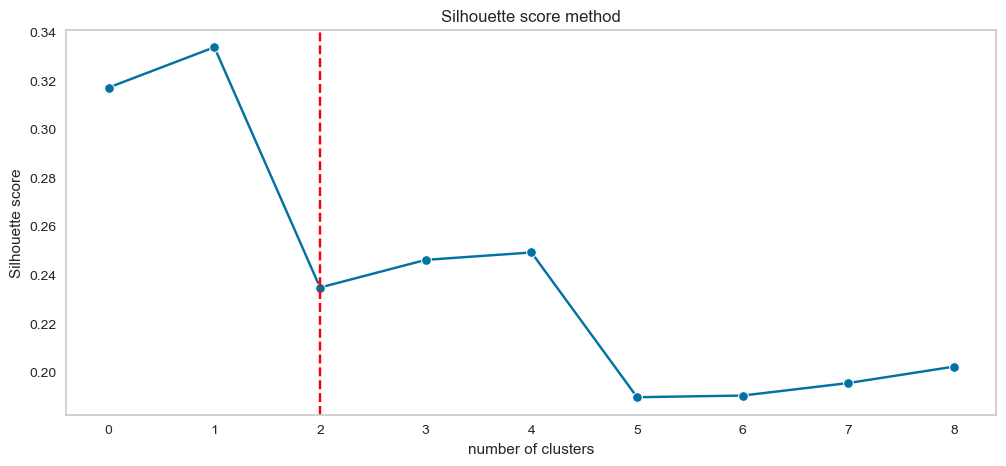

In [62]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot( s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


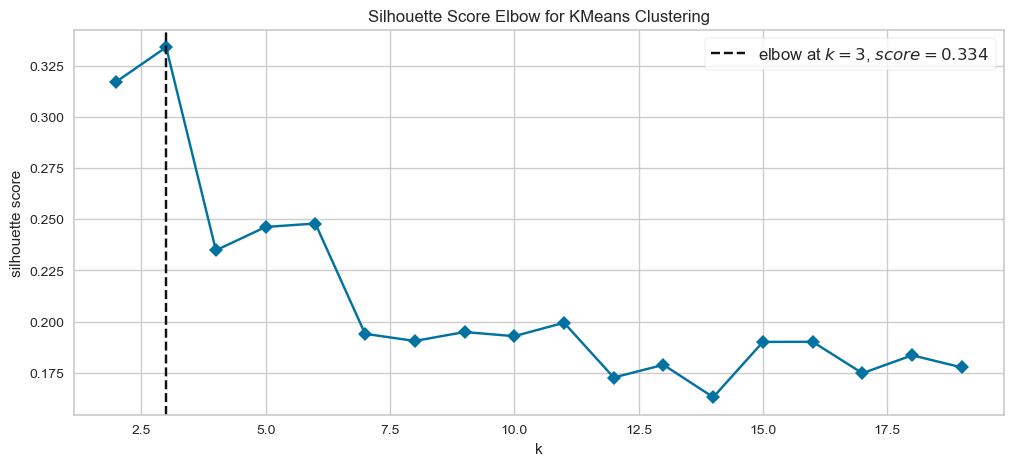

In [65]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
std_airline_imputed = imputer.fit_transform(std_airline)

# Define KMeans model
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Create the Elbow Visualizer
visualizer = KElbowVisualizer(model, k=(2, 20), metric='silhouette', timings=False)

# Plot the Elbow plot
fig, ax = plt.subplots(figsize=(12, 5))
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_airline_imputed)
visualizer.poof()
plt.show()


In [67]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
std_airline_imputed = imputer.fit_transform(std_airline)

# Perform KMeans clustering for different values of n_clusters
clust_list = [2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_airline_imputed)
    sil_score1 = silhouette_score(std_airline_imputed, cluster_labels1)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {sil_score1}")


For n_clusters = 2, The average silhouette_score is: 0.31731079475669105
For n_clusters = 3, The average silhouette_score is: 0.3331710116633036
For n_clusters = 4, The average silhouette_score is: 0.23477115769396925
For n_clusters = 5, The average silhouette_score is: 0.24616047727315166
For n_clusters = 6, The average silhouette_score is: 0.1882963556235668
For n_clusters = 7, The average silhouette_score is: 0.18601399253381432
For n_clusters = 8, The average silhouette_score is: 0.19561315981038388
For n_clusters = 9, The average silhouette_score is: 0.19457705228391595


In [69]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
std_airline_imputed = imputer.fit_transform(std_airline)

# Apply KMeans clustering
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline_imputed)

# Check the shape of the predicted labels
print(y_predict_kmeans.shape)


(2704,)


In [70]:
y_predict_kmeans

array([1, 0, 0, ..., 2, 3, 2])

In [71]:
model_kmeans.labels_

array([1, 0, 0, ..., 2, 3, 2])

In [73]:
# Ensure the model has been fitted before accessing cluster_centers_
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline_imputed)

# Access the cluster centers after fitting the model
print(model_kmeans.cluster_centers_)

[[ 1.42226941 -0.07379791 -0.20744733  0.23174178  0.24776952 -0.15540318
  -0.21776127  0.08600085  1.4102723  -0.82603251  0.36934742 -1.45966189
  -1.39112705 -0.79385304  0.          1.29816022 -1.34800279 -0.89740531
  -0.11170872 -0.94046688]
 [-0.04698911 -0.08560721 -0.11498962  0.18816702  0.09271116 -0.13671304
  -0.1986191   0.13414361 -0.14115693 -0.52315753  0.09119853  0.13196957
   0.08145532 -0.46151507  0.          0.16924271 -0.01964256 -0.33639137
  -0.0531292  -0.14277365]
 [-1.04768364 -0.12858503  0.06769442 -0.32948182 -0.31715798  0.02051664
   0.79534128 -0.13629172 -0.89166509  1.12853957 -0.32079995  0.90933257
   0.85599169  0.8723459   0.         -1.29646266  0.8456091   1.60008853
  -0.09154676  0.7060096 ]
 [-0.52081997 -0.19642862 -0.09326457 -0.19532591 -0.10517373 -0.09990404
  -0.36243128 -0.17137709 -0.55556871  0.61067916 -0.23371663  0.60172787
   0.64818056  0.77178324  0.         -0.42533751  0.72061351 -0.09811669
  -0.16892039  0.62329081]
 [-0

In [74]:
model_kmeans.inertia_

23887.604228546767

In [82]:
WD_df = pd.read_excel(r"E:\DS PROJECT\World_development_mesurement (1).xlsx")
# Continue with renaming columns and other operations
WD_df.rename(columns={'GDP#':'GDP', 'Country?':'Country'}, inplace=True)
WD_df.set_index('GDP', inplace=True)
# Adding the KMeans labels to the DataFrame
WD_df['Kmeans_Label'] = model_kmeans.labels_

In [83]:
WD_df.groupby('Kmeans_Label').agg(['mean'])

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,,,,,,
0,0.038483,6.838515e+03,56.212195,150.475000,1.225456e+04,0.058442,334.822086,0.073041,0.021141,0.233458,55.904306,53.716108,0.193782,1.0,0.435627,0.533518,0.030844,1.758492e+07,0.332651
1,0.022177,6.670288e+04,55.759062,125.675676,3.492513e+04,0.058525,366.497175,0.028278,0.089683,0.165911,72.669643,67.279337,0.339635,1.0,0.323158,0.621765,0.055081,2.484093e+07,0.526764
2,0.011102,1.895884e+05,20.532009,44.754717,8.192872e+04,0.084858,260.406332,0.006140,0.531173,0.085336,80.646758,74.293515,0.986783,1.0,0.170645,0.679928,0.149427,2.008111e+07,0.735689
3,0.016337,6.414718e+04,24.422222,78.340000,3.704222e+04,0.052300,238.250000,0.012024,0.399811,0.096090,78.193483,73.101833,0.951916,1.0,0.248862,0.683464,0.067676,1.049067e+07,0.715240
4,0.016237,4.279423e+06,30.758621,51.500000,1.574755e+06,0.084579,357.782609,0.026447,0.289474,0.074658,73.973684,70.394737,0.442105,1.0,0.241526,0.673553,0.084895,9.079704e+08,0.516895
5,0.041143,1.260361e+03,38.928571,163.666667,1.161736e+04,0.069786,293.928571,0.081857,0.023810,0.244737,53.547619,51.023810,0.245000,1.0,0.438643,0.533000,0.028286,1.478130e+07,0.353357


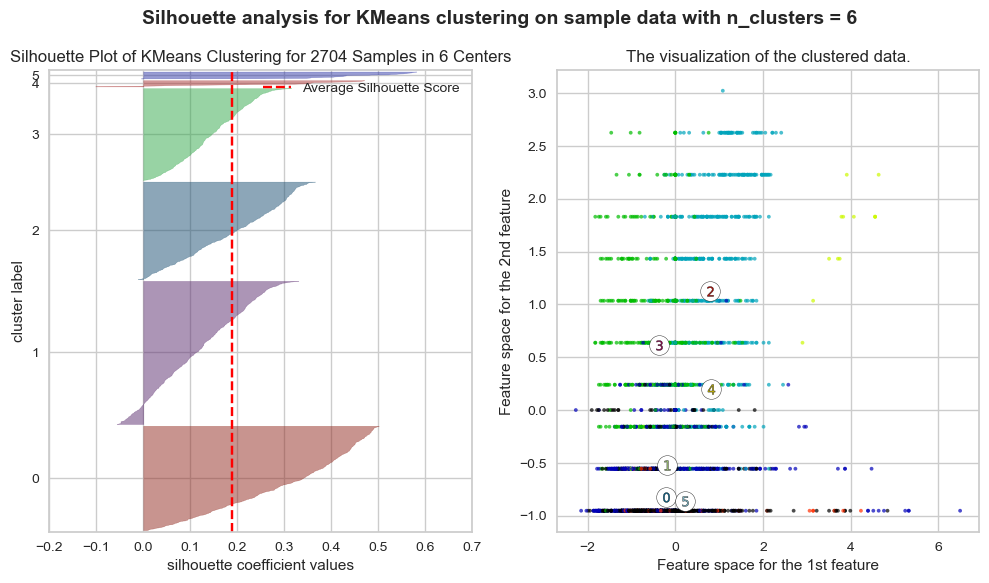

In [86]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
std_airline_cleaned = imputer.fit_transform(std_airline)

# Create silhouette visualizer
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(12, 6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans, ax=ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_airline_cleaned)

# Visualize clusters on a scatter plot
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6)  # 6 is number of clusters
ax2.scatter(std_airline_cleaned[:, 6], std_airline_cleaned[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Label the clusters with cluster centers
centers1 = model_kmeans.cluster_centers_
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title(label="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6), fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()


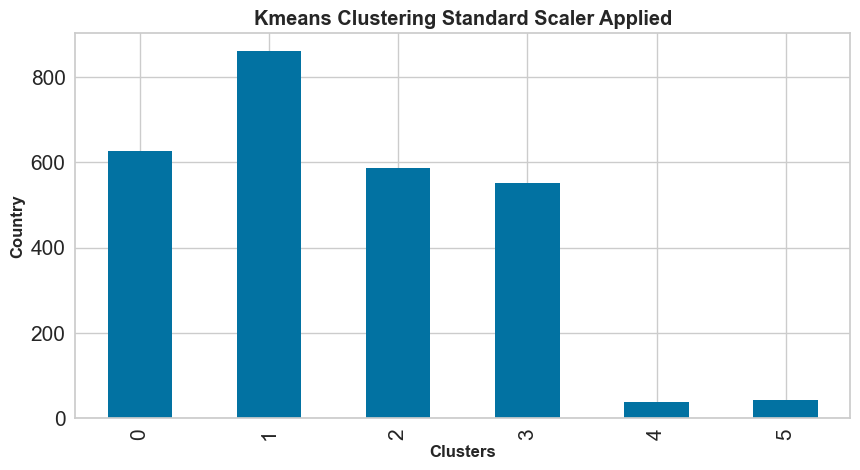

In [90]:
fig, ax = plt.subplots(figsize=(10,5))
WD_df.groupby(['Kmeans_Label']).count()['Country'].plot(kind='bar')
plt.ylabel('Country')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('Country', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [93]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Proceed with clustering using the imputed data
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(norm_airline_imputed)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"Num_Clusters": cluster_range, "Cluster_Errors": cluster_errors})
clusters_df


,Num_Clusters,Cluster_Errors
0,1,1449.693596
1,2,751.421382
2,3,577.188919
3,4,513.584868
4,5,470.210419
5,6,439.959776
6,7,414.541069
7,8,387.685127
8,9,367.420202
9,10,353.447514


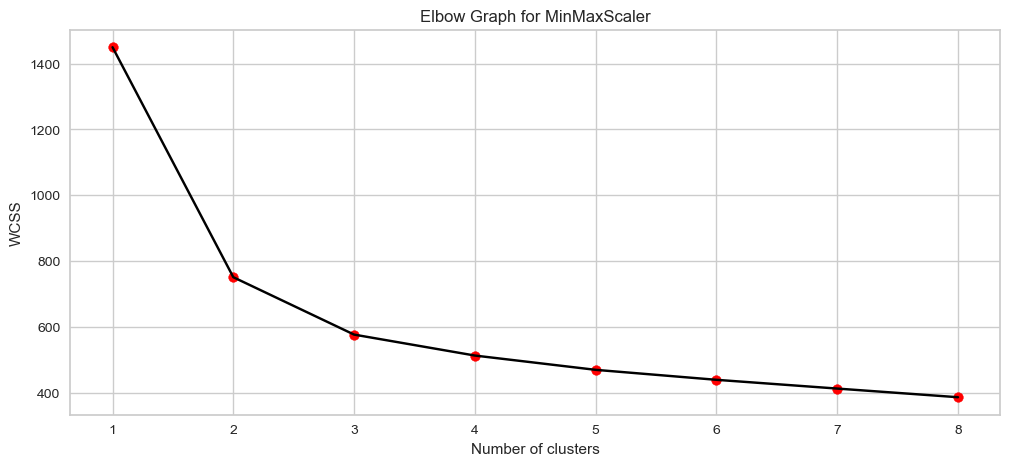

In [96]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(norm_airline_imputed)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(range(1, 9), wcss, color='black')
plt.scatter(range(1, 9), wcss, color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


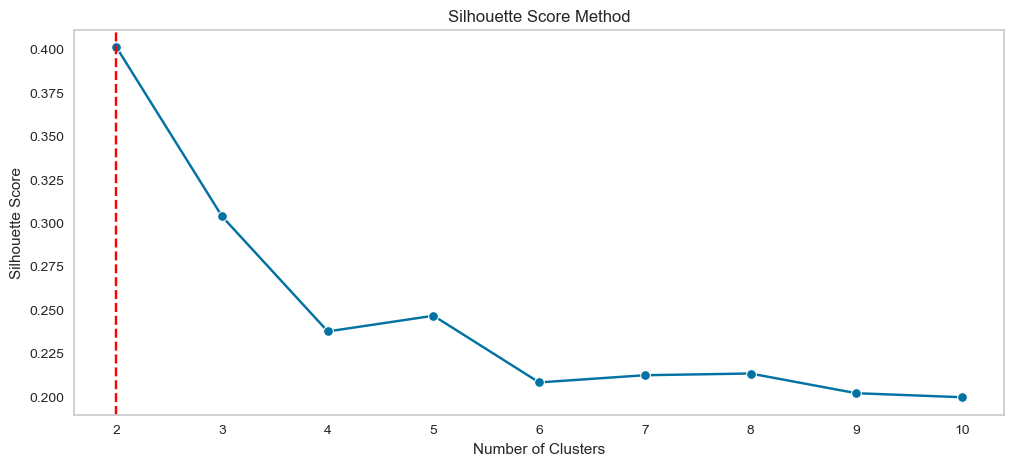

In [109]:
from sklearn.impute import SimpleImputer

# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Now run KMeans clustering
n_clusters = [2,3,4,5,6,7,8,9,10]
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(norm_airline_imputed)
    silhouette_avg = silhouette_score(norm_airline_imputed, KM_est.labels_)
    s_scores.append(silhouette_avg)

# Plot the silhouette scores
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()


Elbow Plot for Normalization data


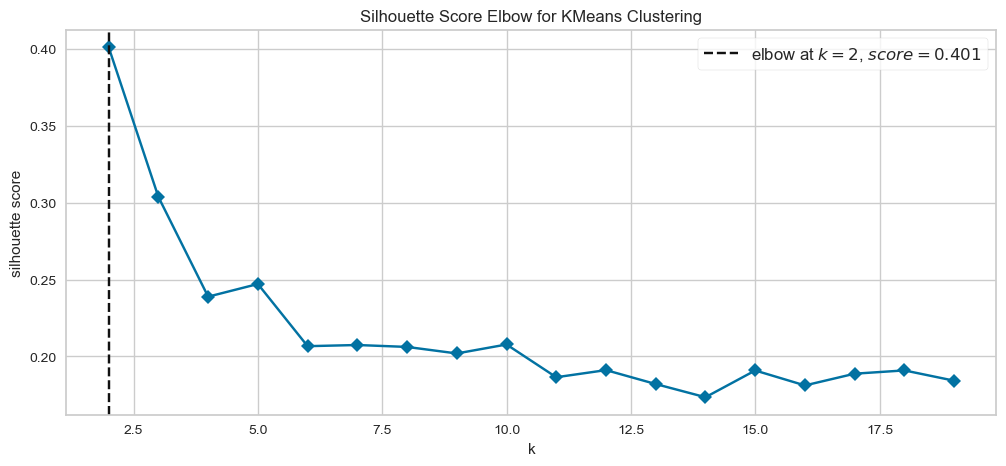

In [100]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Set up KMeans and ElbowVisualizer
model = KMeans(random_state=10, max_iter=500, init='k-means++')
plt.subplots(figsize=(12, 5))

visualizer = KElbowVisualizer(model, k=(2, 20), metric='silhouette', timings=False)

# Fit the model and visualize the Elbow plot
print('Elbow Plot for Normalization data')
visualizer.fit(norm_airline_imputed)
visualizer.poof()
plt.show()


In [102]:
# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Now run your clustering code on the imputed data
clust_list = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_airline_imputed)
    sil_score1 = silhouette_score(norm_airline_imputed, cluster_labels1)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.4011445129551943
For n_clusters = 3 The average silhouette_score is : 0.30372346870786493
For n_clusters = 4 The average silhouette_score is : 0.2386177597841506
For n_clusters = 5 The average silhouette_score is : 0.24652399586225732
For n_clusters = 6 The average silhouette_score is : 0.20891388975391692
For n_clusters = 7 The average silhouette_score is : 0.2120331721649396
For n_clusters = 8 The average silhouette_score is : 0.21419737387385146
For n_clusters = 9 The average silhouette_score is : 0.2013034674979192


In [104]:
# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Now run your KMeans model
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_airline_imputed)
print(y_predict_kmeans.shape)


(2704,)


In [110]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 0, 0])

In [111]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [112]:
model_kmeans.cluster_centers_

array([[0.18672919, 0.11267998, 0.02376664, 0.04946313, 0.48958986,
        0.03452525, 0.27610063, 0.1104301 , 0.09761133, 0.36288152,
        0.02437847, 0.80519762, 0.6848978 , 0.27022021, 0.        ,
        0.31101948, 0.49982977, 0.39109694, 0.02210734, 0.65938019],
       [0.59102138, 0.1401378 , 0.00655366, 0.06724554, 0.51503471,
        0.01830998, 0.23106463, 0.11474191, 0.42142579, 0.04149603,
        0.03605285, 0.45228681, 0.40506328, 0.08525411, 0.        ,
        0.7636199 , 0.21127675, 0.13345267, 0.02515775, 0.30580686]])

In [113]:
model_kmeans.inertia_

751.4213820164613

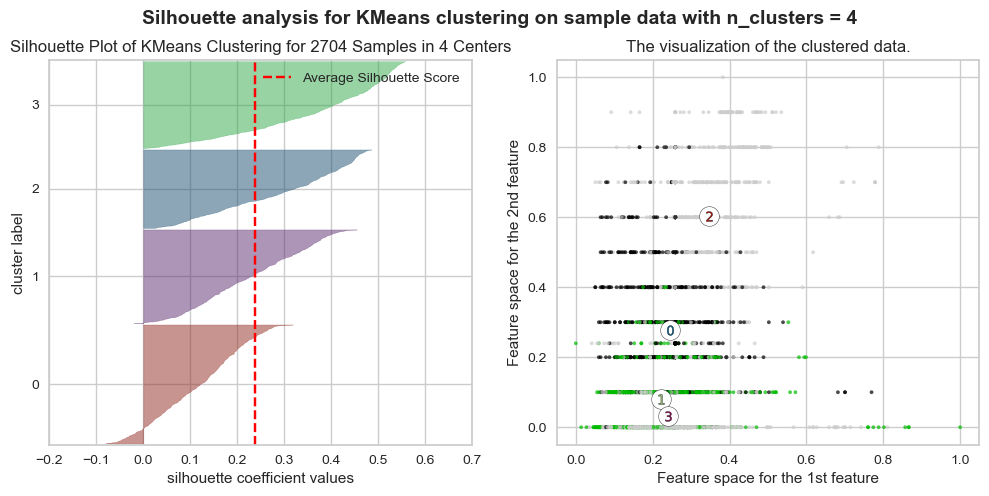

In [115]:
from sklearn.impute import SimpleImputer

# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Fit the KMeans model again
model_kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++')
model_kmeans.fit(norm_airline_imputed)

# Create the silhouette visualizer
from yellowbrick.cluster import SilhouetteVisualizer
fig,(ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(12, 5)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans, ax=ax1, colors=['#922B21', '#5B2C6F', '#1B4F72', '#32a84a'])
sil_visualizer1.fit(norm_airline_imputed)

# Plot clustered data
import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2)
ax2.scatter(norm_airline_imputed[:, 6], norm_airline_imputed[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Plot centers
centers1 = model_kmeans.cluster_centers_
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o', c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title(label="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {4}", fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()


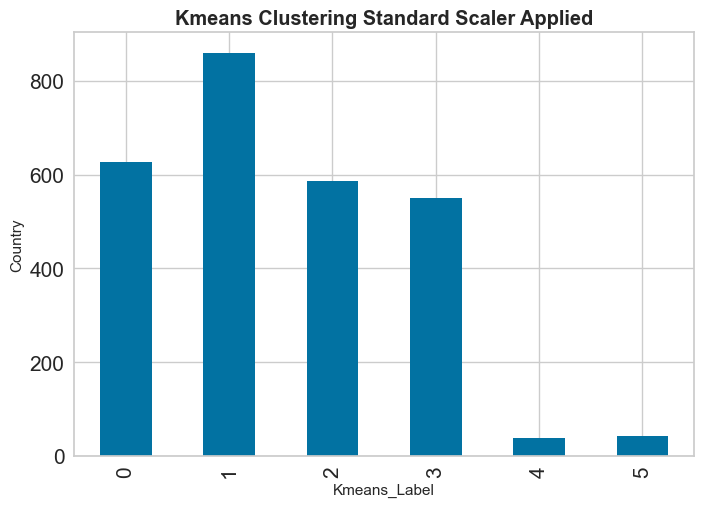

In [117]:
WD_df.groupby(['Kmeans_Label']).count()['Country'].plot(kind='bar')
plt.ylabel('Country')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Country', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [119]:
WD_df.groupby('Kmeans_Label').agg(['mean'])

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,,,,,,
0,0.038483,6.838515e+03,56.212195,150.475000,1.225456e+04,0.058442,334.822086,0.073041,0.021141,0.233458,55.904306,53.716108,0.193782,1.0,0.435627,0.533518,0.030844,1.758492e+07,0.332651
1,0.022177,6.670288e+04,55.759062,125.675676,3.492513e+04,0.058525,366.497175,0.028278,0.089683,0.165911,72.669643,67.279337,0.339635,1.0,0.323158,0.621765,0.055081,2.484093e+07,0.526764
2,0.011102,1.895884e+05,20.532009,44.754717,8.192872e+04,0.084858,260.406332,0.006140,0.531173,0.085336,80.646758,74.293515,0.986783,1.0,0.170645,0.679928,0.149427,2.008111e+07,0.735689
3,0.016337,6.414718e+04,24.422222,78.340000,3.704222e+04,0.052300,238.250000,0.012024,0.399811,0.096090,78.193483,73.101833,0.951916,1.0,0.248862,0.683464,0.067676,1.049067e+07,0.715240
4,0.016237,4.279423e+06,30.758621,51.500000,1.574755e+06,0.084579,357.782609,0.026447,0.289474,0.074658,73.973684,70.394737,0.442105,1.0,0.241526,0.673553,0.084895,9.079704e+08,0.516895
5,0.041143,1.260361e+03,38.928571,163.666667,1.161736e+04,0.069786,293.928571,0.081857,0.023810,0.244737,53.547619,51.023810,0.245000,1.0,0.438643,0.533000,0.028286,1.478130e+07,0.353357


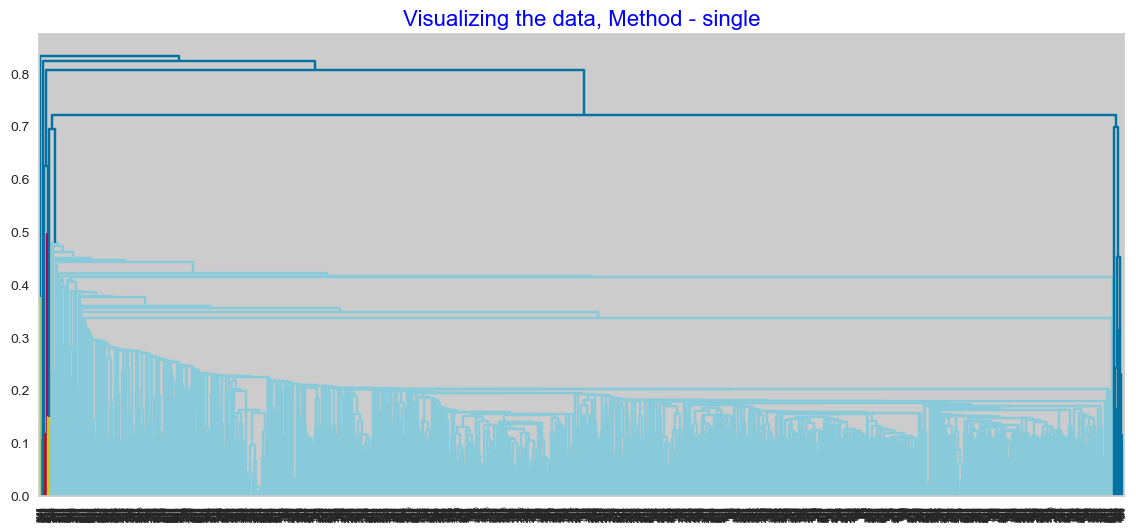

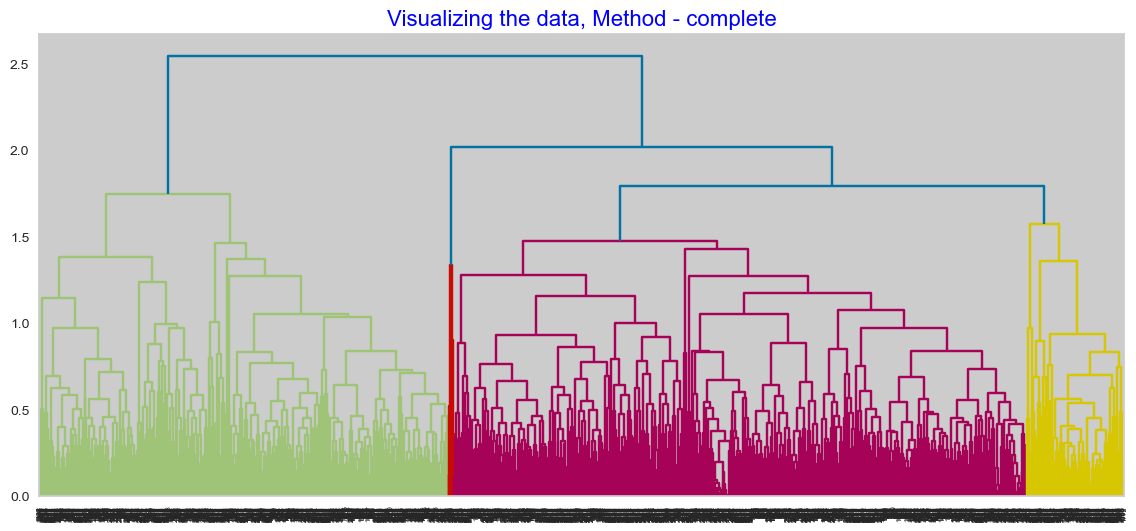

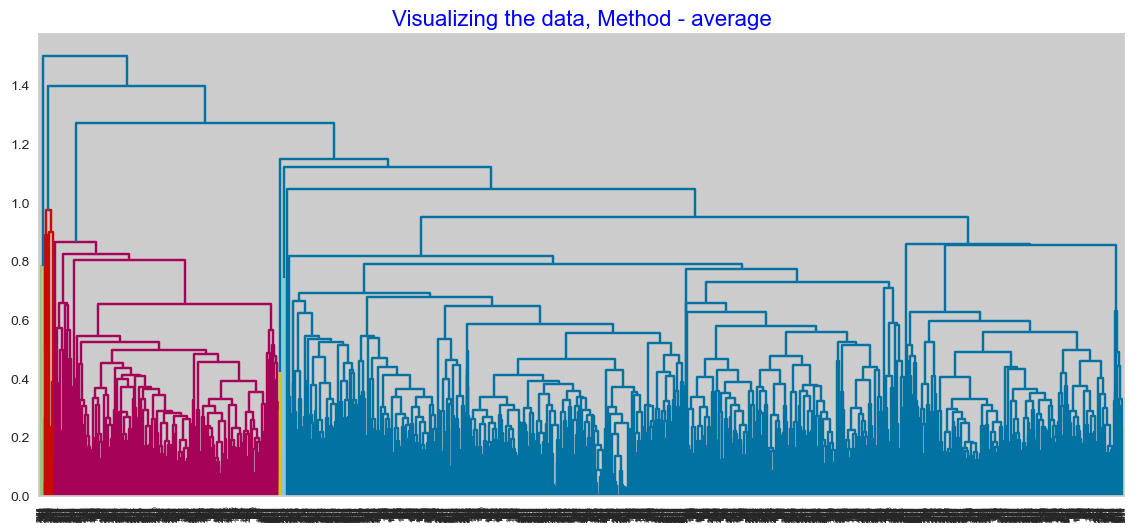

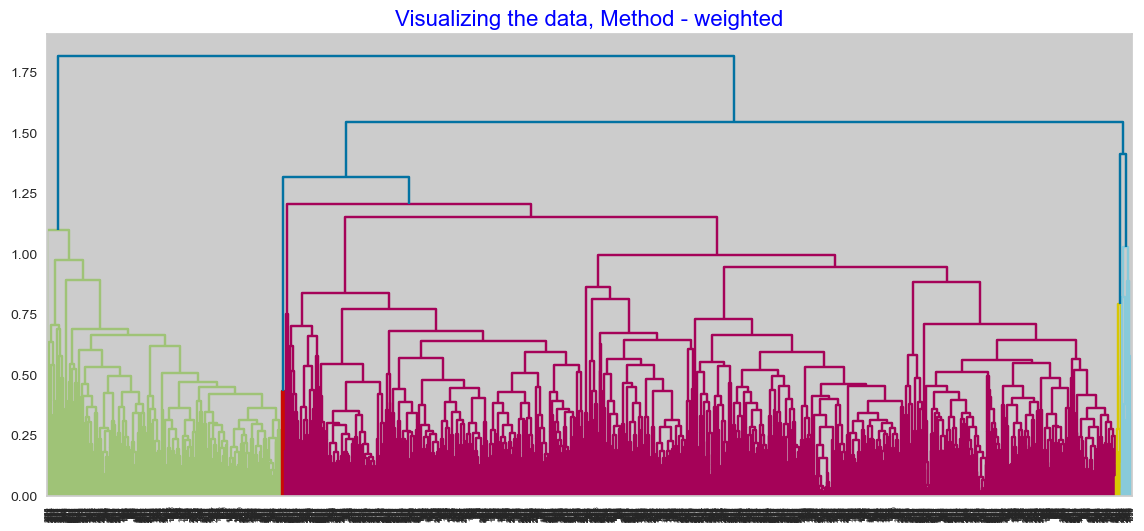

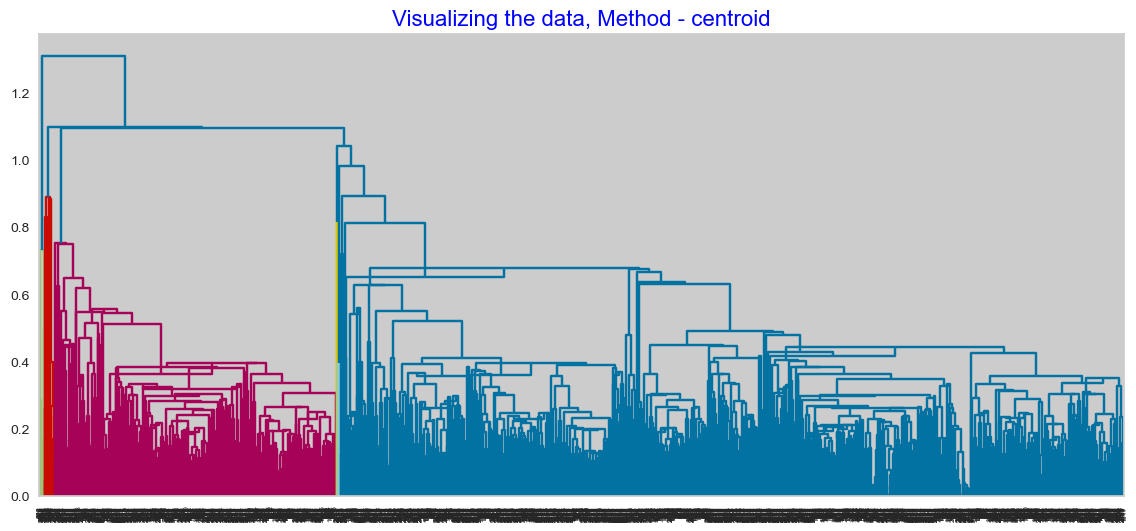

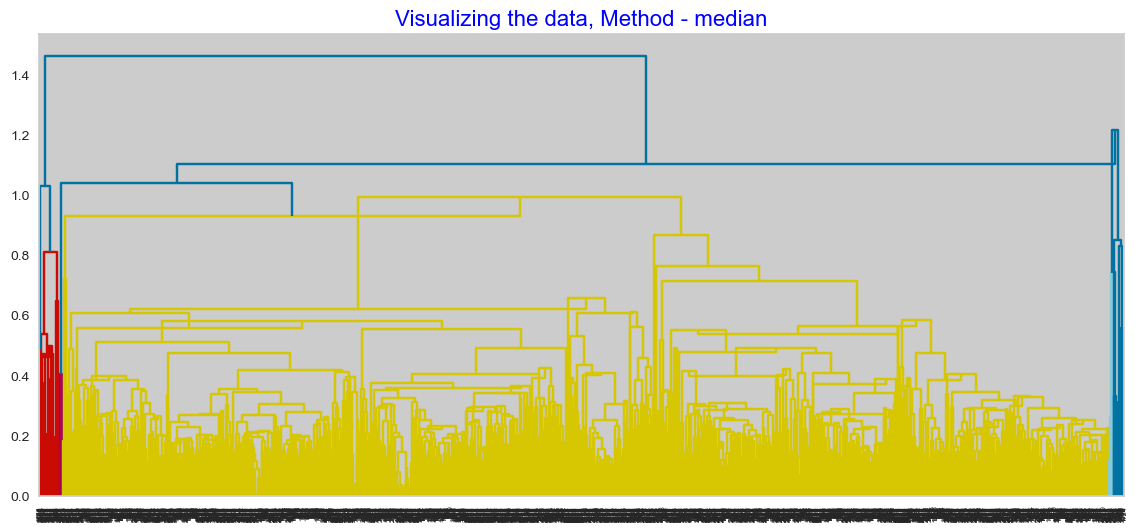

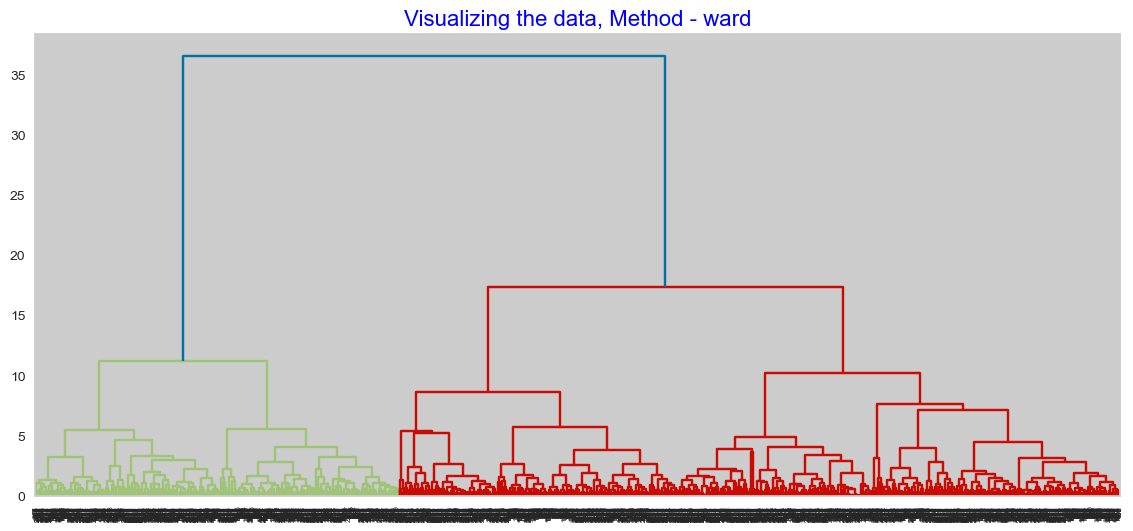

In [121]:

# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Perform hierarchical clustering with different methods
for methods in ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']:
    plt.figure(figsize=(14,6))
    dict = {'fontsize': 16, 'fontweight': 14, 'color': 'blue'}
    plt.title(f'Visualizing the data, Method - {methods}', fontdict=dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_airline_imputed, method=methods, optimal_ordering=False))
    plt.show()


In [123]:
# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n, linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(norm_airline_imputed)
        silhouette_score1 = silhouette_score(norm_airline_imputed, hie_labels1)
        print(f"For n_clusters = {n}, The average silhouette_score with linkage {linkages}: {silhouette_score1}")
    print()


For n_clusters = 2, The average silhouette_score with linkage ward: 0.39145571359774217
For n_clusters = 2, The average silhouette_score with linkage complete: 0.38511752539598326
For n_clusters = 2, The average silhouette_score with linkage average: 0.3567885151391063
For n_clusters = 2, The average silhouette_score with linkage single: 0.22968065391198592

For n_clusters = 3, The average silhouette_score with linkage ward: 0.27114819046083594
For n_clusters = 3, The average silhouette_score with linkage complete: 0.3857927928931065
For n_clusters = 3, The average silhouette_score with linkage average: 0.2887437485156636
For n_clusters = 3, The average silhouette_score with linkage single: 0.22537099878744107

For n_clusters = 4, The average silhouette_score with linkage ward: 0.1987581956658717
For n_clusters = 4, The average silhouette_score with linkage complete: 0.2616099255914113
For n_clusters = 4, The average silhouette_score with linkage average: 0.328902232178973
For n_cluste

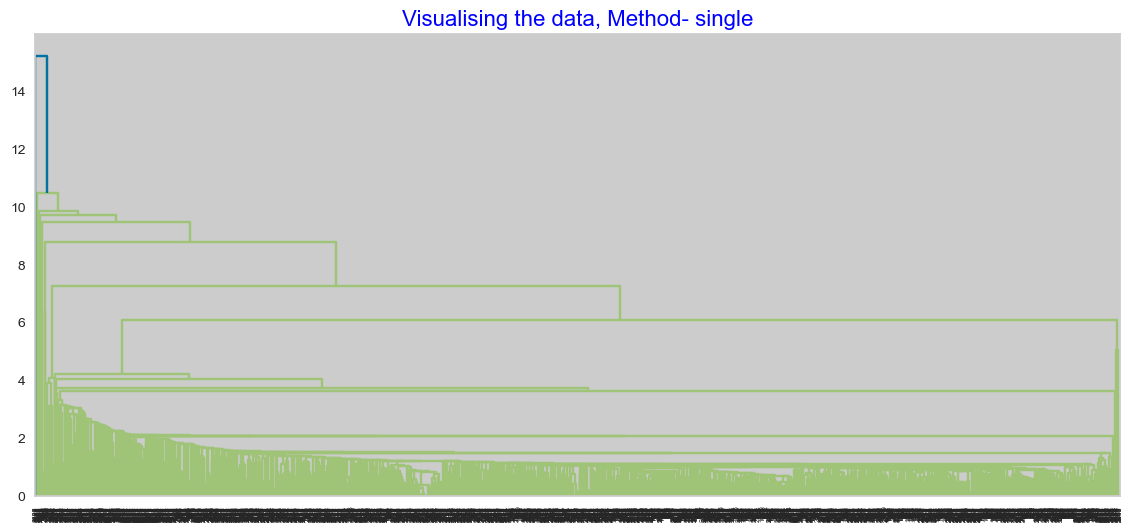

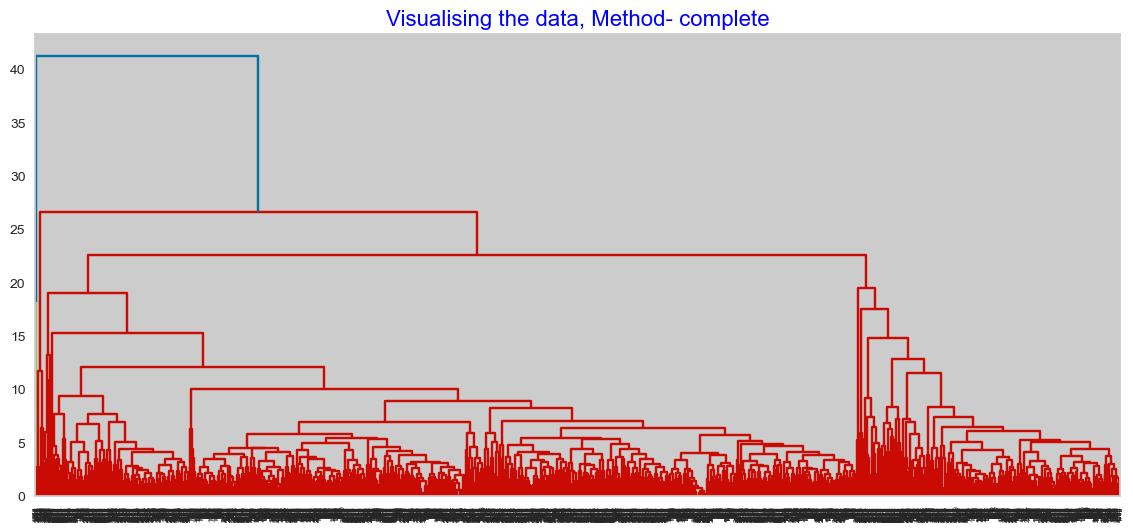

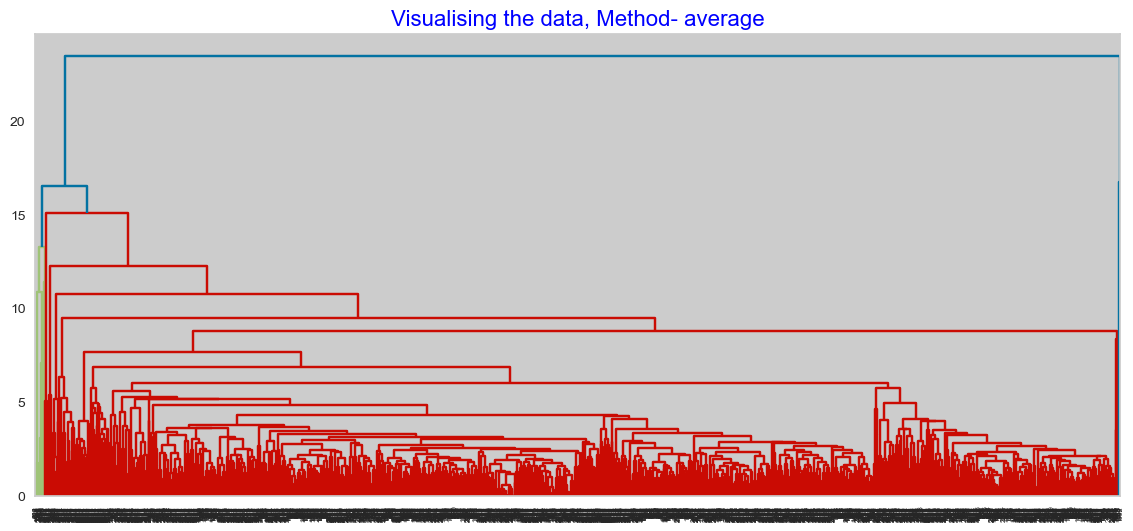

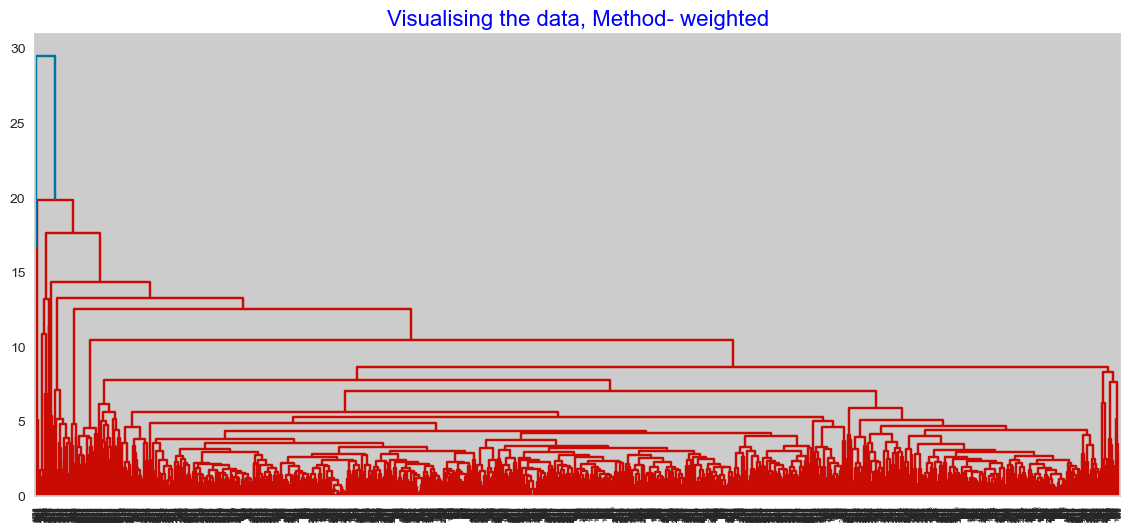

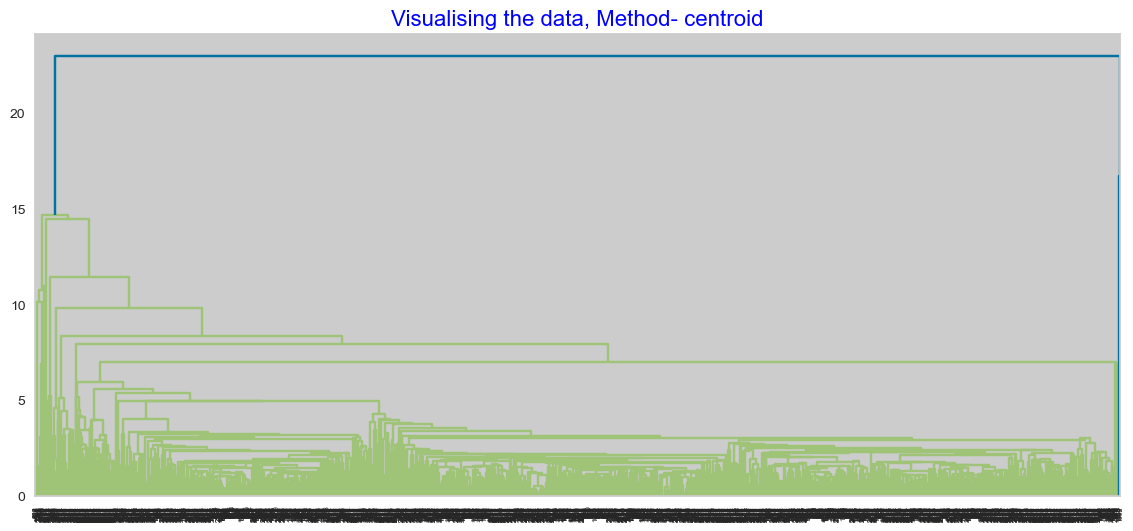

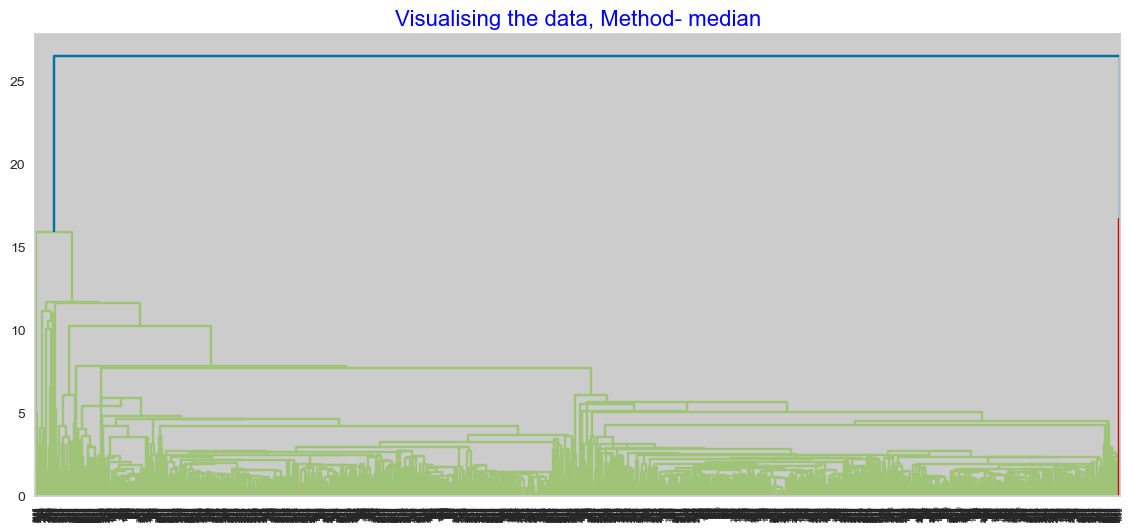

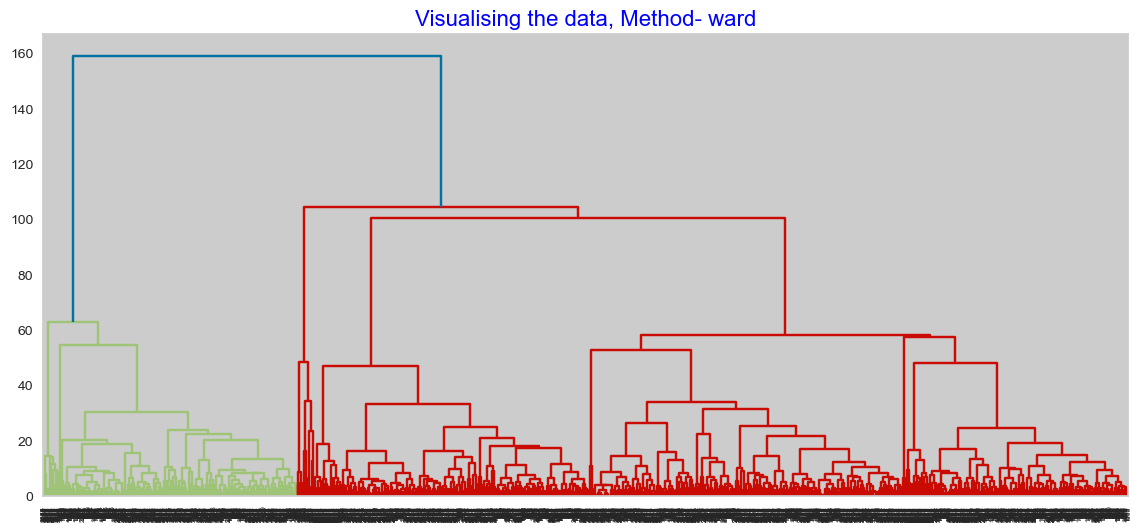

In [128]:
import scipy.cluster.hierarchy as sch
for methods in ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']:
    plt.figure(figsize=(14, 6))
    dict = {'fontsize': 16, 'fontweight': 14, 'color': 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods), fontdict=dict)
    Dendrogram2 = sch.dendrogram(sch.linkage(std_airline_cleaned, method=methods, optimal_ordering=False))
    plt.show()


In [129]:
n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels2 = hie_cluster2.fit_predict(std_airline)
        silhouette_score2 = silhouette_score(std_airline, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

ValueError: Input X contains NaN.
AgglomerativeClustering does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [130]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in n_clusters:
    for linkage in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hie_labels2 = hie_cluster2.fit_predict(std_airline_cleaned)
        silhouette_score2 = silhouette_score(std_airline_cleaned, hie_labels2)
        print(f"For n_clusters = {n_cluster}, linkage = {linkage}, silhouette_score = {silhouette_score2}")
    print()


For n_clusters = 2, linkage = ward, silhouette_score = 0.3115621868054223
For n_clusters = 2, linkage = complete, silhouette_score = 0.7721924126710528
For n_clusters = 2, linkage = average, silhouette_score = 0.7721924126710528
For n_clusters = 2, linkage = single, silhouette_score = 0.8425615773384295

For n_clusters = 3, linkage = ward, silhouette_score = 0.3332721783342265
For n_clusters = 3, linkage = complete, silhouette_score = 0.6995420653090694
For n_clusters = 3, linkage = average, silhouette_score = 0.7046846205435408
For n_clusters = 3, linkage = single, silhouette_score = 0.652321291781231

For n_clusters = 4, linkage = ward, silhouette_score = 0.220291377786957
For n_clusters = 4, linkage = complete, silhouette_score = 0.3357720938659788
For n_clusters = 4, linkage = average, silhouette_score = 0.6833025790980661
For n_clusters = 4, linkage = single, silhouette_score = 0.6464488398622168

For n_clusters = 5, linkage = ward, silhouette_score = 0.22895673563211452
For n_clu

In [141]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_airline_cleaned)

print(y_pred_hie.shape)
print(y_pred_hie)


(2704,)
[0 1 1 ... 0 0 0]


In [142]:
agg_clustering.n_clusters_

2

In [144]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_airline_cleaned)

# Compute and print silhouette score
sil_score = (silhouette_score(norm_airline_cleaned, y_pred_hie) * 100).round(3)
print("Silhouette Score (%):", sil_score)


Silhouette Score (%): 39.146


In [147]:
WD_df['Hierarchical_Labels'] = agg_clustering.labels_

In [148]:
WD_df.groupby('Hierarchical_Labels').agg(['mean'])

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,,,,,,
0,0.015987,210576.076642,33.196330,69.008403,98197.281915,0.067382,298.326304,0.013907,0.347892,0.119376,77.778916,72.001807,0.759665,1.0,0.238951,0.664912,0.096137,3.704857e+07,0.677152,2.001114
1,0.035140,18428.316556,51.807325,141.515152,18422.469083,0.058558,308.615534,0.064795,0.033639,0.207766,59.057269,56.333700,0.227829,1.0,0.414309,0.551570,0.034112,2.039789e+07,0.340339,0.498899


In [149]:
from itertools import product

eps_values = np.arange(0.25,3,0.25)
min_samples = np.arange(3,23)
DBSCAN_params = list(product(eps_values, min_samples))

In [152]:
from sklearn.cluster import DBSCAN
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_airline_cleaned)
    labels = DBS_clustering.labels_
    no_of_clusters.append(len(np.unique(labels)))
    
    # Compute silhouette score only if there is more than one cluster
    if len(np.unique(labels)) > 1:
        sil_score.append(silhouette_score(std_airline_cleaned, labels))
    else:
        sil_score.append(-1)  # Assign -1 for cases with no valid clusters

print("Number of Clusters:", no_of_clusters)
print("Silhouette Scores:", sil_score)


Number of Clusters: [74, 20, 11, 9, 7, 7, 6, 5, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 296, 135, 51, 21, 12, 9, 7, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 2, 2, 2, 318, 228, 156, 80, 36, 23, 17, 12, 9, 8, 7, 6, 4, 4, 4, 4, 4, 4, 4, 2, 192, 157, 113, 92, 68, 33, 28, 25, 24, 17, 18, 16, 13, 11, 9, 9, 9, 6, 6, 4, 92, 81, 70, 54, 40, 20, 10, 9, 6, 8, 3, 3, 4, 2, 2, 3, 3, 4, 4, 4, 55, 44, 38, 31, 30, 14, 11, 7, 7, 3, 5, 6, 3, 3, 2, 2, 2, 2, 2, 2, 46, 35, 31, 27, 23, 8, 8, 7, 6, 3, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 33, 27, 23, 21, 18, 11, 8, 6, 6, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 24, 21, 19, 17, 13, 9, 8, 7, 6, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 20, 19, 18, 16, 13, 8, 6, 6, 6, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 16, 15, 14, 12, 10, 7, 6, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Silhouette Scores: [-0.45376490407166015, -0.45475574025901805, -0.41744071245912207, -0.41665401742718533, -0.3421144690192049, -0.3421144690192049, -0.34515881627544964, -0.34938076031258725, -0.32182418355980186, -0.29126545310836266, -0.

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


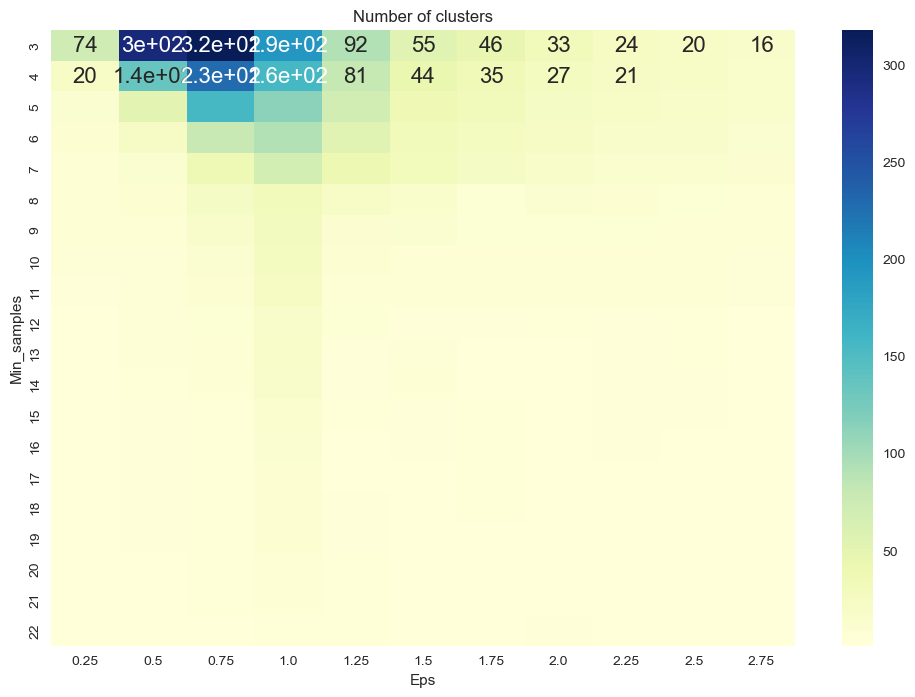

In [153]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

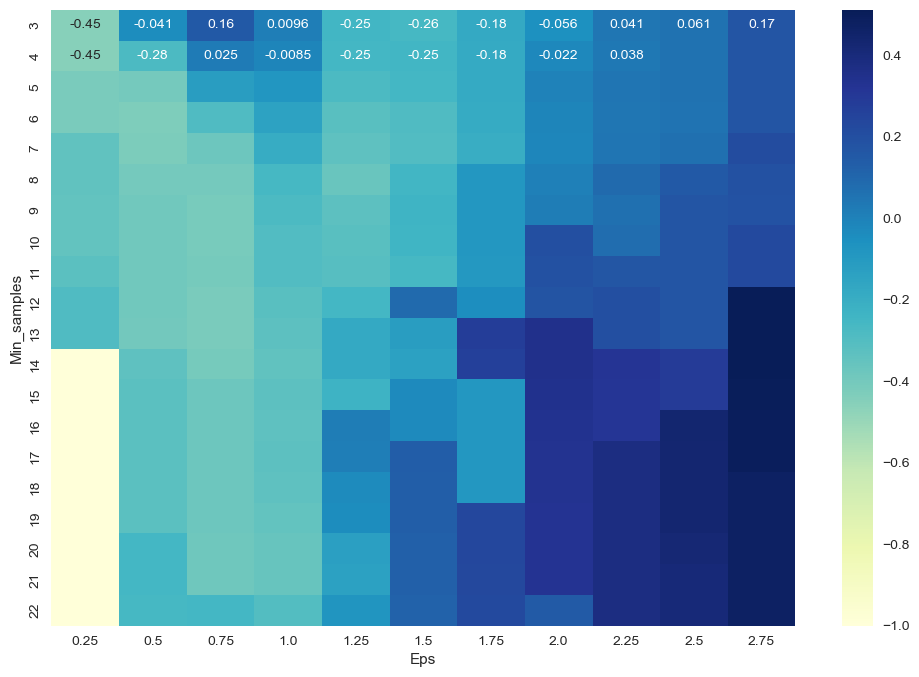

In [154]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [155]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_airline)

        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [156]:
epsilon = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75]
min_samples = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
sil_avg = []
max_value = [0, 0, 0, 0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(std_airline_cleaned)

        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # Check if silhouette score can be calculated
        if n_clusters_ > 1:
            silhouette_avg = silhouette_score(std_airline_cleaned, labels)
            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])


epsilon= 2.25 
min_sample= 14 
number of clusters= 2 
average silhouette score= 0.3204


In [158]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_airline_cleaned)


DBSCAN(eps=2.5, min_samples=21)

In [160]:
WD_df['DBSCAN_Labels'] = dbscan.labels_
WD_df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
GDP,,,,,,,,,,,,,,,,,,,,,
"$54,790,058,957",0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,0.035,$60,NaN,...,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",1,0,0
"$9,129,594,819",0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,0.034,$22,NaN,...,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",0,1,-1
"$2,359,122,303",0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,0.043,$15,NaN,...,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",0,1,0
"$5,788,311,645",0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,0.047,$152,NaN,...,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",0,1,0
"$2,610,959,139",0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,0.051,$12,NaN,...,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",0,1,0


In [162]:
WD_df.groupby('DBSCAN_Labels').agg(['mean'])

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,,,,,,,,
-1,0.025613,1.024418e+06,67.358491,99.810811,463739.165605,0.076762,469.363265,0.042105,0.235439,0.234152,...,62.913357,0.647670,1.0,0.314551,0.617746,0.067721,1.522241e+08,0.549332,2.107266,0.415225
0,0.022364,6.950936e+04,35.009635,87.472973,39963.582310,0.062496,267.066610,0.031582,0.240294,0.136463,...,66.890877,0.569531,1.0,0.301614,0.624198,0.074183,1.700528e+07,0.564600,1.423602,0.326294


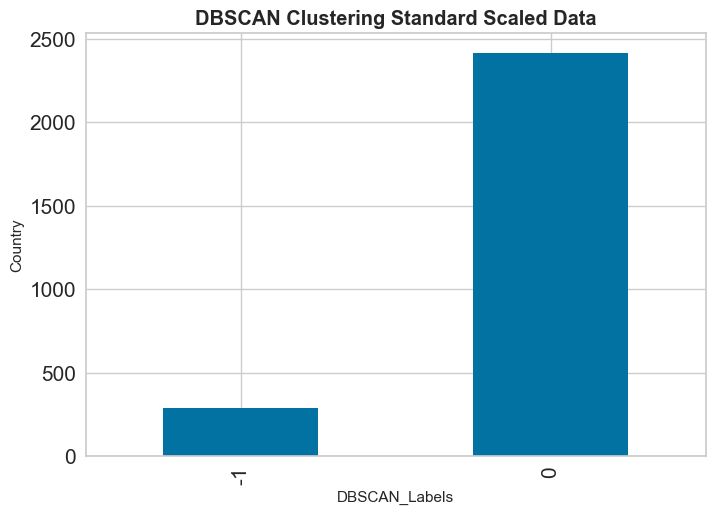

In [163]:
WD_df.groupby(['DBSCAN_Labels']).count()['Country'].plot(kind='bar')
plt.ylabel('Country')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Country', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [164]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25)
min_samples = np.arange(3,23)
DBSCAN_params = list(product(eps_values, min_samples))

In [170]:
labels = DBS_clustering.labels_
unique_labels = np.unique(labels)
print(f"Unique labels: {unique_labels}")  # This will show how many unique clusters DBSCAN has found

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_airline_imputed)  # or norm_airline_cleaned
    labels = DBS_clustering.labels_
    unique_labels = np.unique(labels)
    no_of_clusters.append(len(unique_labels))

    # Only calculate silhouette score if there are at least 2 clusters
    if len(unique_labels) > 1:
        sil_score.append(silhouette_score(norm_airline_imputed, labels))  # or norm_airline_cleaned
    else:
        sil_score.append(None)  # or handle as needed


Unique labels: [0]


Length of no_of_clusters: 160
Length of DBSCAN_params: 80
[(0.25, 3), (0.25, 4), (0.25, 5), (0.25, 6), (0.25, 7), (0.25, 8), (0.25, 9), (0.25, 10), (0.25, 11), (0.25, 12), (0.25, 13), (0.25, 14), (0.25, 15), (0.25, 16), (0.25, 17), (0.25, 18), (0.25, 19), (0.25, 20), (0.25, 21), (0.25, 22), (0.5, 3), (0.5, 4), (0.5, 5), (0.5, 6), (0.5, 7), (0.5, 8), (0.5, 9), (0.5, 10), (0.5, 11), (0.5, 12), (0.5, 13), (0.5, 14), (0.5, 15), (0.5, 16), (0.5, 17), (0.5, 18), (0.5, 19), (0.5, 20), (0.5, 21), (0.5, 22), (0.75, 3), (0.75, 4), (0.75, 5), (0.75, 6), (0.75, 7), (0.75, 8), (0.75, 9), (0.75, 10), (0.75, 11), (0.75, 12), (0.75, 13), (0.75, 14), (0.75, 15), (0.75, 16), (0.75, 17), (0.75, 18), (0.75, 19), (0.75, 20), (0.75, 21), (0.75, 22), (1.0, 3), (1.0, 4), (1.0, 5), (1.0, 6), (1.0, 7), (1.0, 8), (1.0, 9), (1.0, 10), (1.0, 11), (1.0, 12), (1.0, 13), (1.0, 14), (1.0, 15), (1.0, 16), (1.0, 17), (1.0, 18), (1.0, 19), (1.0, 20), (1.0, 21), (1.0, 22)]
A heatplot shows how many clusters were generated

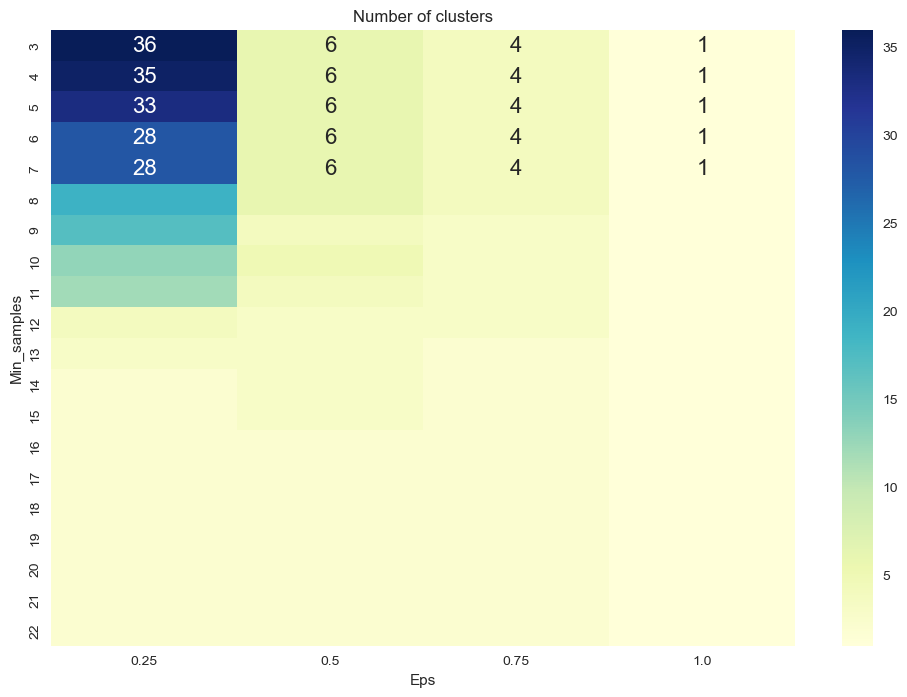

In [176]:
print(f"Length of no_of_clusters: {len(no_of_clusters)}")
print(f"Length of DBSCAN_params: {len(DBSCAN_params)}")


no_of_clusters = []  # Ensure this is initialized before the loop

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_airline_imputed)
    unique_labels = np.unique(DBS_clustering.labels_)
    no_of_clusters.append(len(unique_labels))  # Append the count of unique labels (clusters)


print(DBSCAN_params)  # Make sure it has 80 parameter combinations


tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters  # Now lengths match

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were generated by the algorithm for the respective parameter combinations.')
plt.show()


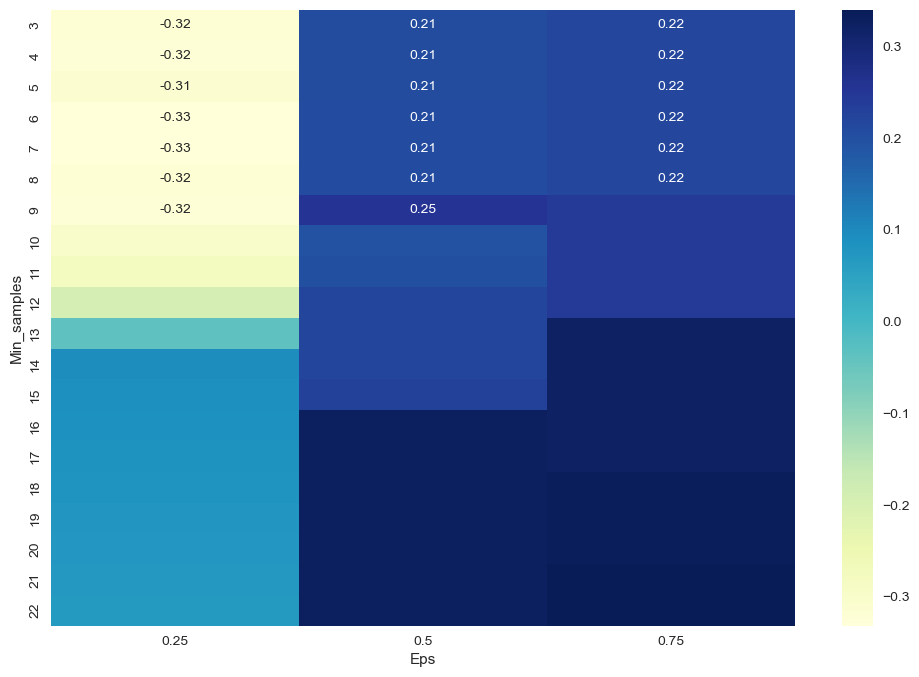

In [181]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [182]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)

        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [184]:
unique_labels = set(labels)
if len(unique_labels) > 1:  # Ensure there is more than one cluster
    silhouette_avg = silhouette_score(norm_airline_imputed, labels)
    if silhouette_avg > max_value[3]:
        max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
    sil_avg.append(silhouette_avg)
else:
    print(f"Skipping silhouette score for eps={epsilon[i]}, min_samples={min_samples[j]} (only 1 cluster or noise)")

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
norm_airline_imputed = imputer.fit_transform(norm_airline)

epsilon = [0.25, 0.5, 0.75, 1]
min_samples = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
sil_avg = []
max_value = [0, 0, 0, 0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(norm_airline_imputed)

        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline_imputed, labels)
        if silhouette_avg > max_value[3]:
            max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])


Skipping silhouette score for eps=1, min_samples=11 (only 1 cluster or noise)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [185]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

epsilon = [0.25, 0.5, 0.75, 1]
min_samples = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
sil_avg = []
max_value = [0, 0, 0, 0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(norm_airline_imputed)

        labels = db.labels_

        # Check number of clusters
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters_ <= 1:
            continue  # Skip silhouette score calculation if only 1 or no cluster

        silhouette_avg = silhouette_score(norm_airline_imputed, labels)
        if silhouette_avg > max_value[3]:
            max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_sample =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])


epsilon = 0.75 
min_sample = 11 
number of clusters = 2 
average silhouette score = 0.2453


In [192]:
# Step 1: Impute missing values with the mean (you can choose other strategies)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
norm_airline_imputed = imputer.fit_transform(norm_airline)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=22)
dbscan.fit(norm_airline_imputed)


DBSCAN(eps=1, min_samples=22)

In [194]:
WD_df['DBSCAN_Labels'] = dbscan.labels_
WD_df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
GDP,,,,,,,,,,,,,,,,,,,,,
"$54,790,058,957",0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,0.035,$60,NaN,...,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",1,0,0
"$9,129,594,819",0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,0.034,$22,NaN,...,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",0,1,0
"$2,359,122,303",0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,0.043,$15,NaN,...,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",0,1,0
"$5,788,311,645",0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,0.047,$152,NaN,...,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",0,1,0
"$2,610,959,139",0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,0.051,$12,NaN,...,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",0,1,0


In [196]:
WD_df.groupby('DBSCAN_Labels').agg(['mean'])

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,,,,,,,,
0,0.022715,142307.107765,39.999418,94.875676,77236.840896,0.06417,302.068503,0.032813,0.239747,0.148103,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,1.496672,0.335799


In [198]:
cluster1 = pd.DataFrame(WD_df.loc[WD_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(WD_df.loc[WD_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_airline = pd.concat([cluster1,cluster2],axis=1)
avg_airline

,Cluster1_Avg,Cluster2_Avg
Birth Rate,2.271489e-02,NaN
CO2 Emissions,1.423071e+05,NaN
Days to Start Business,3.999942e+01,NaN
Ease of Business,9.487568e+01,NaN
Energy Usage,7.723684e+04,NaN
Health Exp % GDP,6.416952e-02,NaN
Hours to do Tax,3.020685e+02,NaN
Infant Mortality Rate,3.281301e-02,NaN
Internet Usage,2.397471e-01,NaN
Lending Interest,1.481027e-01,NaN
